<a href="https://www.kaggle.com/code/eavprog/abscur-pred-one-one?scriptVersionId=153552062" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Прогнозирование абсолютного курса одной валюты с использованием всех имеющихся

# Загрузка библиотек

In [1]:
!pip install fedot==0.6.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 95.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 44.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 3.4 MB/s eta 0:00:00
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15079 sha256=8288ca8fbb19d5d2b280dedb4d08f66582d3c1c525a3395b5fac31170f3aaeed
  Stored in directory: /root

In [2]:
# Plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

import time
import pickle

In [3]:
# Prerocessing for FEDOT
from fedot.core.data.data import InputData
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams

from fedot.core.data.data_split import train_test_data_setup
from fedot.core.data.multi_modal import MultiModalData

# FEDOT 
from fedot.core.pipelines.pipeline import Pipeline
from fedot.api.main import Fedot

import logging
logging.raiseExceptions = False

# Импорт данных

In [4]:
abscur_data = pd.read_csv('/kaggle/input/abscur-data/abscur.csv',index_col='Date')
abscur_data

,AUD,HKD,JPY,SEK,USD,CAD,CHF,EUR,CNY,CZK,...,PKR,PLN,QAR,RON,SAR,THB,TRY,TWD,UAH,VND
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-24,12.158873,1.820732,0.119264,1.897328,14.116247,12.508172,14.599988,17.558626,2.298413,0.637008,...,0.139145,4.185072,3.876492,3.966018,3.762827,0.430111,6.332427,0.455730,0.937303,0.000663
2014-11-25,12.042916,1.820498,0.119653,1.901654,14.117342,12.535971,14.636334,17.608462,2.300660,0.638901,...,0.138814,4.219548,3.876793,3.978958,3.763220,0.430407,6.362602,0.456399,0.940717,0.000661
2014-11-26,12.044525,1.819723,0.119890,1.907547,14.105896,12.535264,14.671729,17.641589,2.297937,0.640015,...,0.138701,4.222943,3.874714,3.999744,3.759266,0.430846,6.383914,0.456575,0.942089,0.000660
2014-11-27,12.057413,1.825816,0.119974,1.903370,14.143959,12.473653,14.664200,17.626740,2.303414,0.638719,...,0.139075,4.219055,3.885169,3.987359,3.769410,0.431613,6.411586,0.457807,0.944631,0.000662
2014-11-28,12.074179,1.830585,0.119508,1.909798,14.199736,12.435964,14.708297,17.675934,2.311154,0.640523,...,0.139830,4.241893,3.900276,3.997674,3.783771,0.432523,6.396854,0.458352,0.948610,0.000667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-29,14.075197,2.727820,0.143951,2.052794,21.286216,15.651531,24.330630,23.336254,2.983407,0.963473,...,0.074631,5.380198,5.847862,4.699255,5.677536,0.611673,0.736043,0.681464,0.582068,0.000879
2023-11-30,14.100496,2.733202,0.143775,2.036391,21.360631,15.728334,24.389299,23.249504,2.980861,0.957475,...,0.074942,5.343497,5.868144,4.682295,5.697080,0.605117,0.740300,0.681186,0.584103,0.000882
2023-12-01,14.160927,2.726076,0.144035,2.049257,21.314270,15.737337,24.452551,23.174713,2.974499,0.955264,...,0.074845,5.369510,5.855569,4.679005,5.681684,0.612655,0.737809,0.680837,0.582835,0.000881


# Загрузка истории

In [5]:
!cp -r /kaggle/input/abscur-pred-one-one/*.png .

In [6]:
try:
    with open("/kaggle/input/abscur-pred-one-one/history.pickle", "rb") as file:
        history = pickle.load(file)
except:
    history = []
# history

# Цикл


======================================== ZAR ========================================
2023-12-04 10:48:55,090 - Unknown integration target: 
2023-12-04 10:49:00,355 - Unknown integration target: 
2023-12-04 10:49:06,044 - Unknown integration target: 
2023-12-04 10:49:11,228 - Unknown integration target: 
2023-12-04 10:49:16,532 - Unknown integration target: 
2023-12-04 10:49:28,228 - Unknown integration target: 
2023-12-04 10:49:39,919 - Unknown integration target: 
2023-12-04 10:49:51,747 - Unknown integration target: 
2023-12-04 10:49:53,543 - Unknown integration target: 
2023-12-04 10:49:53,546 - Unknown integration target: 
2023-12-04 10:49:59,563 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 261.6 MiB, max: 264.4 MiB
2023-12-04 10:49:59,566 - ApiComposer - Initial pipeline was fitted in 4.2 sec.
2023-12-04 10:49:59,579 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
20

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-12-04 10:57:10,201 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [07:10<?, ?gen/s]

2023-12-04 10:57:10,230 - ApiComposer - Hyperparameters tuning started with 2 min. timeout


2023-12-04 10:57:23,991 - PipelineTuner - Initial pipeline: {'depth': 7, 'length': 8, 'nodes': [linear, linear, glm, data_source_ts/ZAR, ridge, lagged, linear, decompose]}
linear - {}
linear - {}
glm - {'family': 'gaussian', 'link': 'inverse_power'}
data_source_ts/ZAR - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.017
 70%|███████   | 7/10 [01:54<00:48, 16.29s/trial, best loss: 0.013257010731759103]
2023-12-04 10:59:18,079 - PipelineTuner - Tuner stopped after initial search due to the lack of time
2023-12-04 10:59:33,735 - PipelineTuner - Final pipeline: {'depth': 7, 'length': 8, 'nodes': [linear, linear, glm, data_source_ts/ZAR, ridge, lagged, linear, decompose]}
linear - {}
linear - {}
glm - {'family': 'inverse_gaussian', 'link': 'inverse_power'}
data_source_ts/ZAR - {}
ridge - {'alpha': 5.908147763068855}
lagged - {'window_size': 10}
linear - {}
decompose - {}
2023-12-04 10:59:33,749 - PipelineTuner - Final metric: 0.013
2023-12-04 10:59:

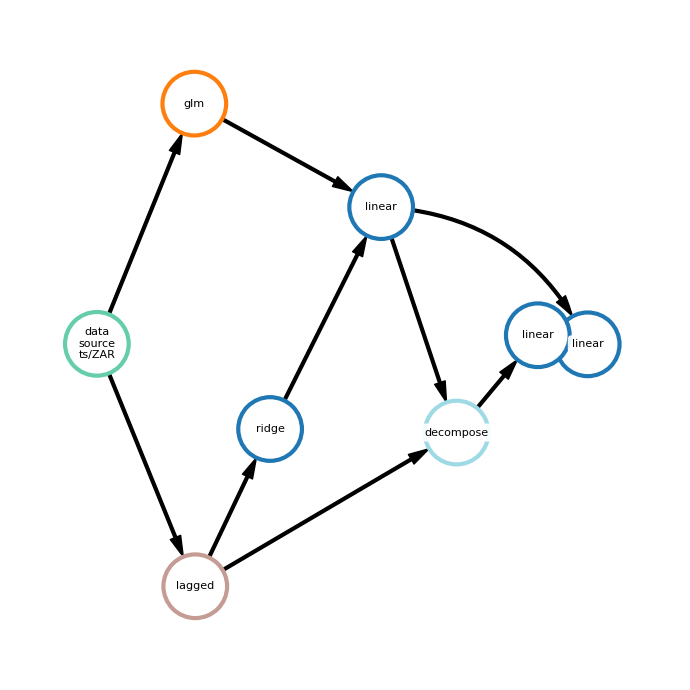

[1.19500872 1.19567189 1.19750576 1.19682842 1.1972912  1.19680697
 1.19744972 1.19922324 1.19959252 1.20099032 1.1991336  1.19668563
 1.19678387 1.19496658 1.19638017 1.19612687]
{'mae': 0.01, 'mape': 0.008}


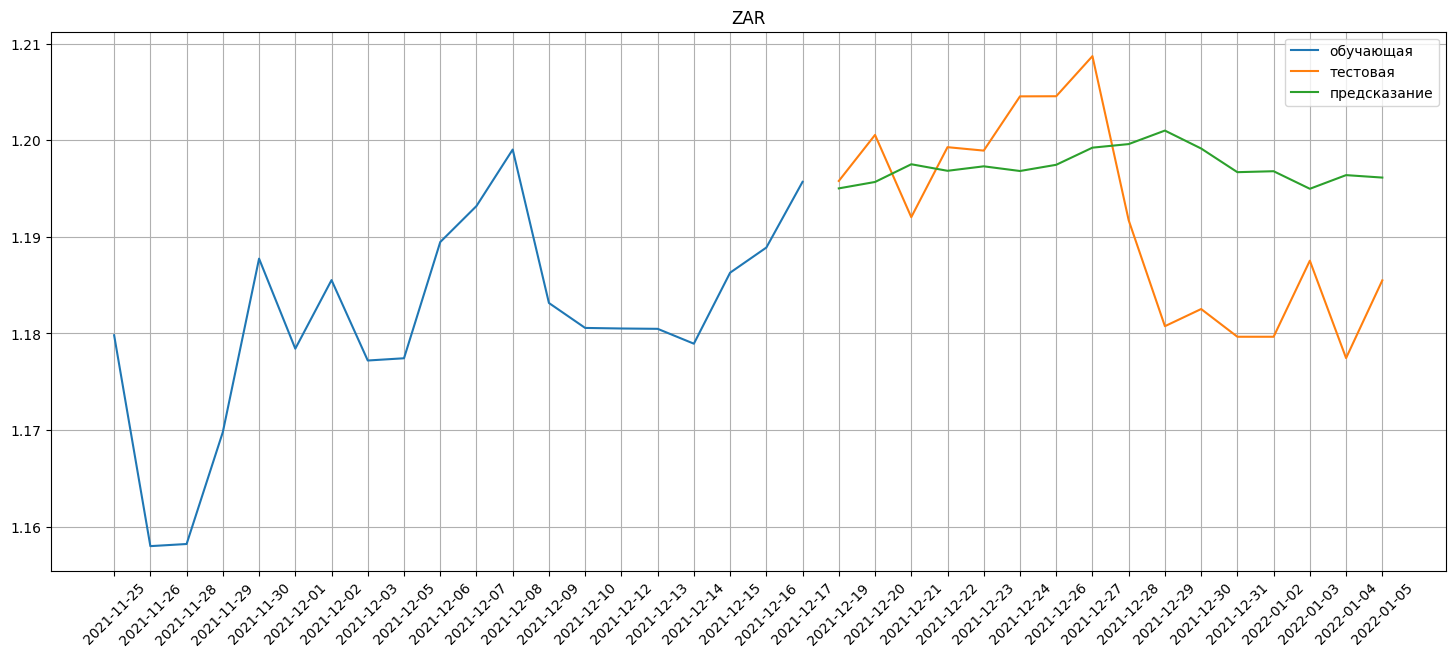


======================================== ARS ========================================
2023-12-04 11:00:07,353 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 4.4 MiB
2023-12-04 11:00:07,355 - ApiComposer - Initial pipeline was fitted in 8.8 sec.
2023-12-04 11:00:07,368 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-12-04 11:00:07,391 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 3 min. Set of candidate models: ['polyfit', 'ar', 'locf', 'sparse_lagged', 'ets', 'gaussian_filter', 'lagged', 'smoothing', 'glm', 'ts_naive_average', 'cut', 'diff_filter', 'ar', 'ets', 'gaussian_filter', 'scaling', 'normalization', 'linear', 'ridge', 'smoothing', 'ts_naive_average', 'sparse_lagged', 'diff_filter', 'polyfit', 'locf', 'adareg', 'pca', 'sgdr', 'rfr', 'lasso', 'ransac_lin_reg', 'lagged', 'ransac_non_lin_reg', 'glm', 'dtreg', 'cut'].
2023-12-04 

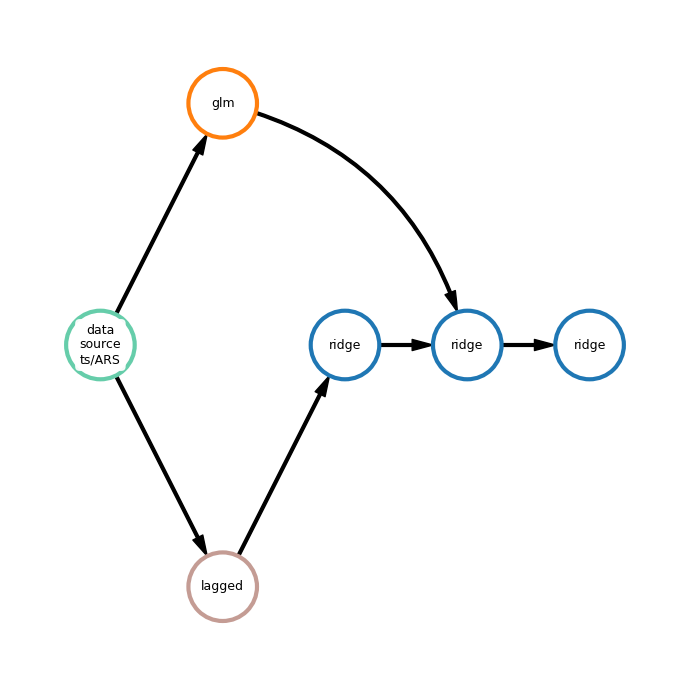

[0.13240771 0.13216519 0.13192236 0.13167784 0.13143326 0.13119001
 0.1309518  0.13071534 0.13047901 0.13024615 0.13001668 0.12979095
 0.12956621 0.12934552 0.12912887 0.12891711]
{'mae': 0.003, 'mape': 0.023}


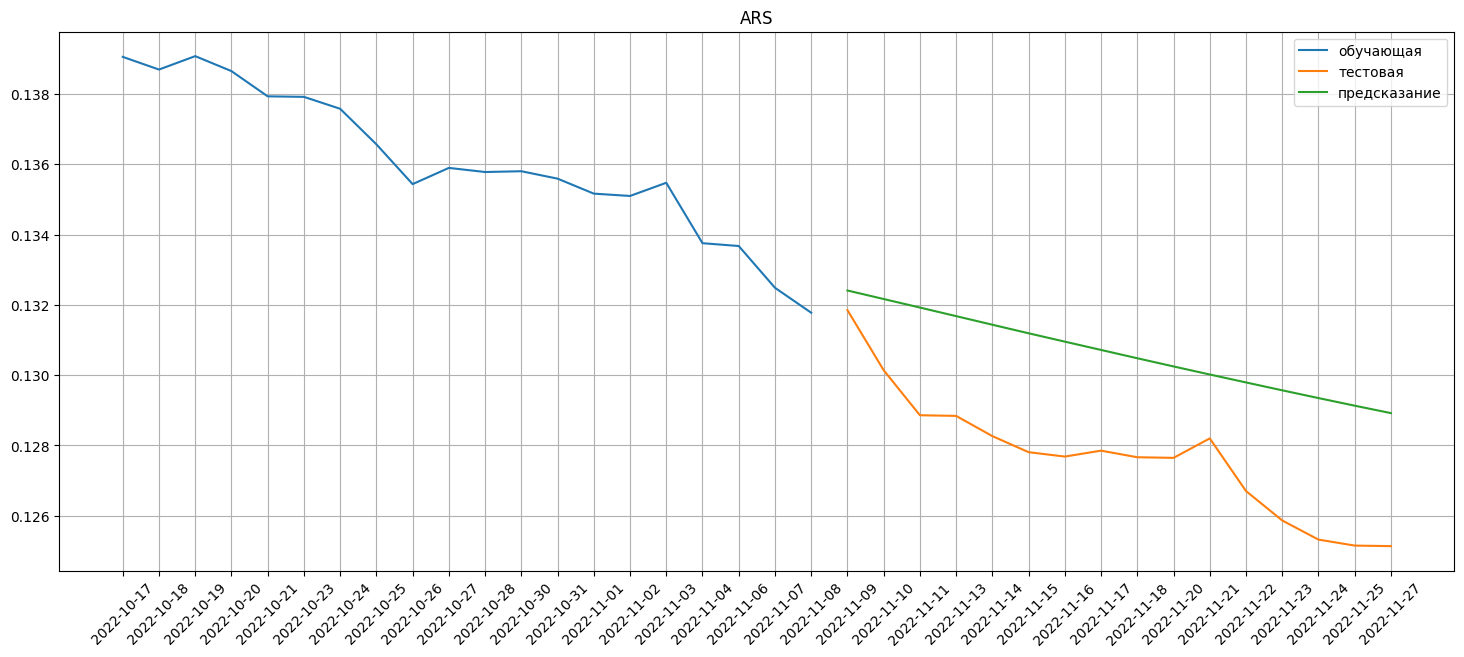


======================================== PHP ========================================
2023-12-04 11:03:31,299 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 4.4 MiB
2023-12-04 11:03:31,302 - ApiComposer - Initial pipeline was fitted in 7.5 sec.
2023-12-04 11:03:31,304 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-12-04 11:03:31,321 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 42 min. Set of candidate models: ['polyfit', 'ar', 'locf', 'sparse_lagged', 'ets', 'gaussian_filter', 'clstm', 'arima', 'lagged', 'smoothing', 'stl_arima', 'glm', 'ts_naive_average', 'cut', 'diff_filter', 'exog_ts', 'ets', 'gaussian_filter', 'scaling', 'poly_features', 'ts_naive_average', 'isolation_forest_reg', 'sparse_lagged', 'adareg', 'lagged', 'stl_arima', 'ransac_non_lin_reg', 'dtreg', 'treg', 'cut', 'ar', 'clstm', 'lgbmreg', 'normalization', 'linear

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-12-04 11:28:26,188 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [24:54<?, ?gen/s]

2023-12-04 11:28:26,209 - ApiComposer - Hyperparameters tuning started with 17 min. timeout


2023-12-04 11:28:59,412 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [adareg, ridge, ridge, arima, data_source_ts/PHP, ridge, lagged, linear, decompose]}
adareg - {}
ridge - {}
ridge - {}
arima - {'p': 2, 'd': 0, 'q': 2}
data_source_ts/PHP - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.002
  0%|          | 22/100000 [10:10<1412:54:31, 50.88s/trial, best loss: 0.0019639912896706204]
2023-12-04 11:47:15,548 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [adareg, ridge, ridge, arima, data_source_ts/PHP, ridge, lagged, linear, decompose]}
adareg - {}
ridge - {}
ridge - {}
arima - {'p': 2, 'd': 0, 'q': 2}
data_source_ts/PHP - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {}
2023-12-04 11:47:15,552 - PipelineTuner - Final metric: 0.002
2023-12-04 11:47:15,559 - ApiComposer - Hyperparameters tuning finished
2023-12-04 11:47:15,933 - ApiComposer - Model generation finished
2023-12-0

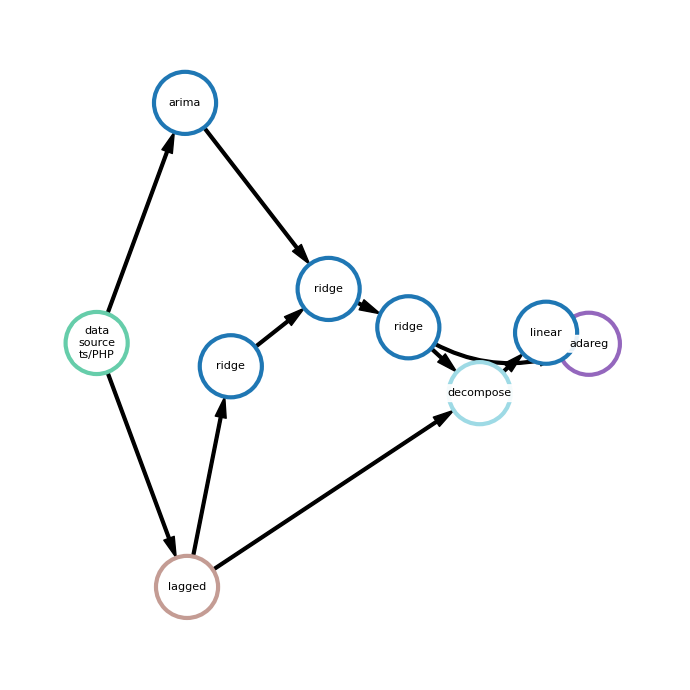

[0.3694962  0.36906369 0.37073475 0.37040107 0.37172946 0.3715276
 0.37053557 0.37229399 0.37162488 0.36923548 0.36907153 0.36906172
 0.36898519 0.36896901 0.36877818 0.36930104 0.36949515 0.36898437]
{'mae': 0.003, 'mape': 0.009}


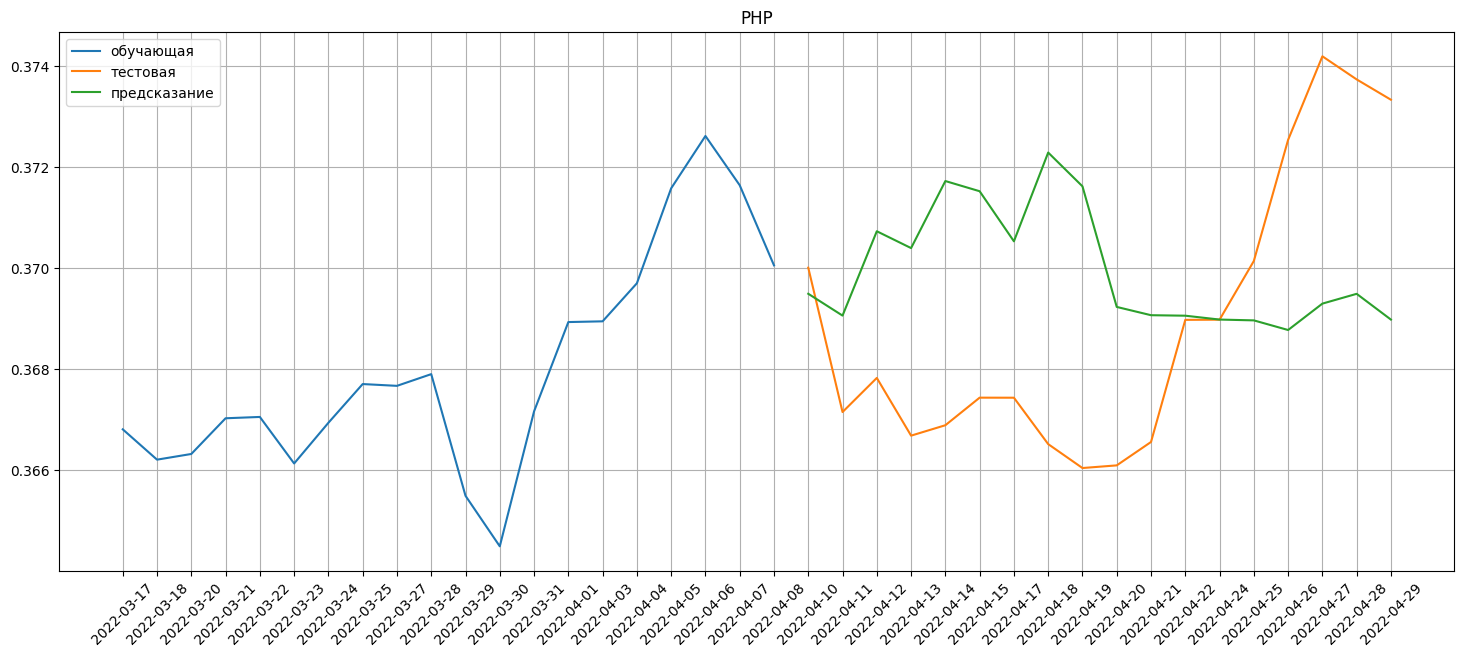


======================================== PEN ========================================
2023-12-04 11:48:39,690 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.0 MiB
2023-12-04 11:48:39,693 - ApiComposer - Initial pipeline was fitted in 12.8 sec.
2023-12-04 11:48:39,696 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-12-04 11:48:39,716 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 21 min. Set of candidate models: ['polyfit', 'ar', 'locf', 'sparse_lagged', 'ets', 'gaussian_filter', 'clstm', 'arima', 'lagged', 'smoothing', 'stl_arima', 'glm', 'ts_naive_average', 'cut', 'diff_filter', 'exog_ts', 'ets', 'gaussian_filter', 'scaling', 'poly_features', 'ts_naive_average', 'isolation_forest_reg', 'sparse_lagged', 'adareg', 'lagged', 'stl_arima', 'ransac_non_lin_reg', 'dtreg', 'treg', 'cut', 'ar', 'clstm', 'lgbmreg', 'normalization', 'linea

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-12-04 12:01:16,607 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [12:36<?, ?gen/s]

2023-12-04 12:01:16,630 - ApiComposer - Hyperparameters tuning started with 8 min. timeout


2023-12-04 12:01:27,151 - PipelineTuner - Initial pipeline: {'depth': 4, 'length': 4, 'nodes': [linear, fast_ica, lagged, data_source_ts/PEN]}
linear - {}
fast_ica - {'whiten': 'unit-variance'}
lagged - {'window_size': 10}
data_source_ts/PEN - {} 
Initial metric: 0.014
  0%|          | 39/100000 [06:26<369:46:20, 13.32s/trial, best loss: 0.013806995132419394]
2023-12-04 12:09:46,552 - PipelineTuner - Final pipeline: {'depth': 4, 'length': 4, 'nodes': [linear, fast_ica, lagged, data_source_ts/PEN]}
linear - {}
fast_ica - {'whiten': 'unit-variance', 'fun': 'exp', 'n_components': 17}
lagged - {'window_size': 431}
data_source_ts/PEN - {}
2023-12-04 12:09:46,555 - PipelineTuner - Final metric: 0.014
2023-12-04 12:09:46,559 - ApiComposer - Hyperparameters tuning finished
2023-12-04 12:09:46,952 - ApiComposer - Model generation finished
2023-12-04 12:10:00,733 - FEDOT logger - Final pipeline was fitted
2023-12-04 12:10:00,738 - FEDOT logger - Final pipeline: {'depth': 4, 'length': 4, 'nodes':

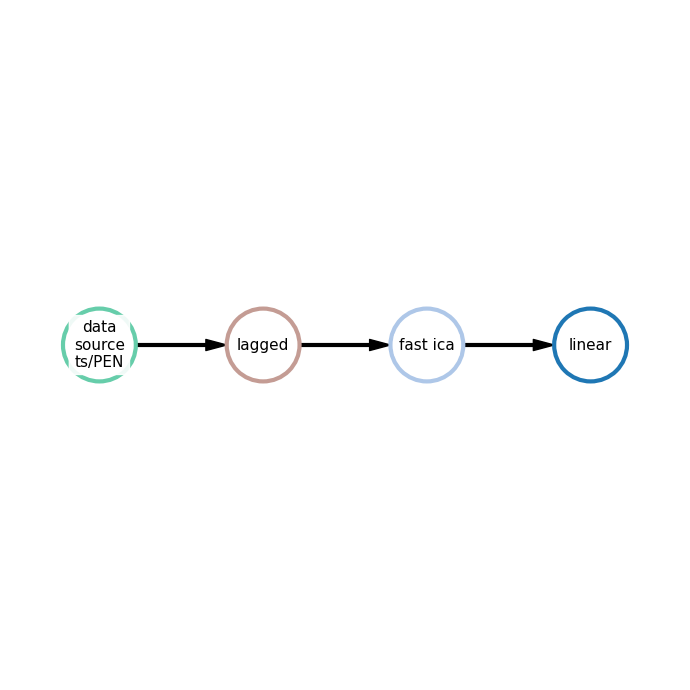

[5.52350713 5.52209934 5.52036064 5.51797761 5.51526038 5.51260402
 5.51005125]
{'mae': 0.009, 'mape': 0.002}


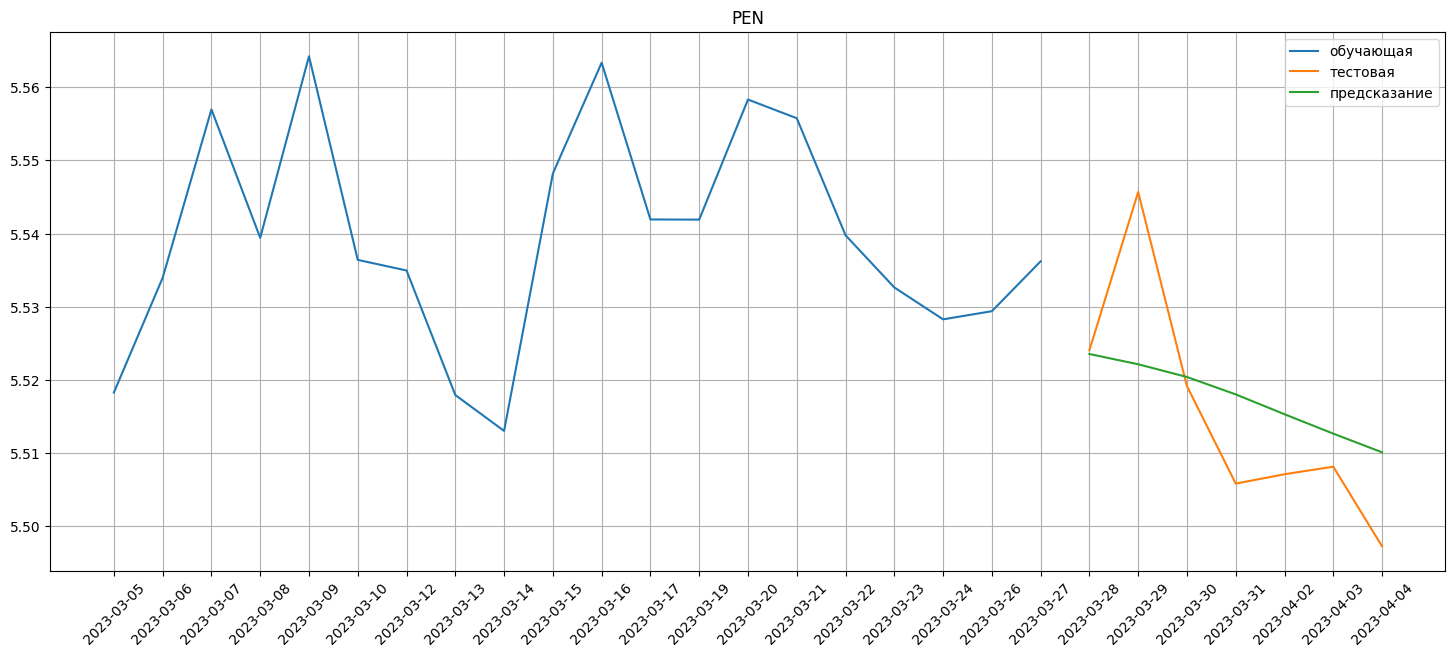


======================================== VND ========================================
2023-12-04 12:10:23,724 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 4.1 MiB
2023-12-04 12:10:23,727 - ApiComposer - Initial pipeline was fitted in 6.6 sec.
2023-12-04 12:10:23,729 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-12-04 12:10:23,746 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 36 min. Set of candidate models: ['polyfit', 'ar', 'locf', 'sparse_lagged', 'ets', 'gaussian_filter', 'clstm', 'arima', 'lagged', 'smoothing', 'stl_arima', 'glm', 'ts_naive_average', 'cut', 'diff_filter', 'exog_ts', 'ets', 'gaussian_filter', 'scaling', 'poly_features', 'ts_naive_average', 'isolation_forest_reg', 'sparse_lagged', 'adareg', 'lagged', 'stl_arima', 'ransac_non_lin_reg', 'dtreg', 'treg', 'cut', 'ar', 'clstm', 'lgbmreg', 'normalization', 'linear

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-12-04 12:31:24,797 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [21:01<?, ?gen/s]

2023-12-04 12:31:24,826 - ApiComposer - Hyperparameters tuning started with 15 min. timeout


2023-12-04 12:31:52,433 - PipelineTuner - Initial pipeline: {'depth': 7, 'length': 8, 'nodes': [adareg, ridge, ridge, glm, data_source_ts/VND, ridge, lagged, linear]}
adareg - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/VND - {}
ridge - {}
lagged - {'window_size': 10}
linear - {} 
Initial metric: 0.000
  0%|          | 25/100000 [09:41<1076:55:16, 38.78s/trial, best loss: 4.1958783324753385e-06]
2023-12-04 12:46:57,326 - PipelineTuner - Final pipeline: {'depth': 7, 'length': 8, 'nodes': [adareg, ridge, ridge, glm, data_source_ts/VND, ridge, lagged, linear]}
adareg - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/VND - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
2023-12-04 12:46:57,329 - PipelineTuner - Final metric: 0.000
2023-12-04 12:46:57,333 - ApiComposer - Hyperparameters tuning finished
2023-12-04 12:46:57,712 - ApiComposer - Model generation finished
2023-12-04 12:47:28,181 - FEDOT 

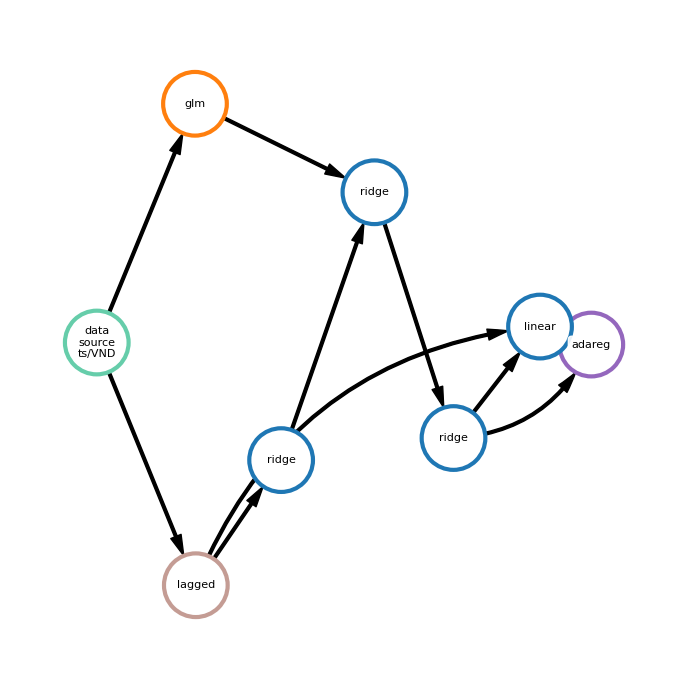

[0.00078344 0.00078153 0.00077696 0.00077691 0.00077705 0.00077956
 0.00078553 0.00078707 0.00078632 0.00078586 0.00078905 0.000791
 0.00079572 0.00079432 0.0007899  0.00079421 0.00079312 0.00079108
 0.00079316 0.00078677]
{'mae': 0.0, 'mape': 0.008}


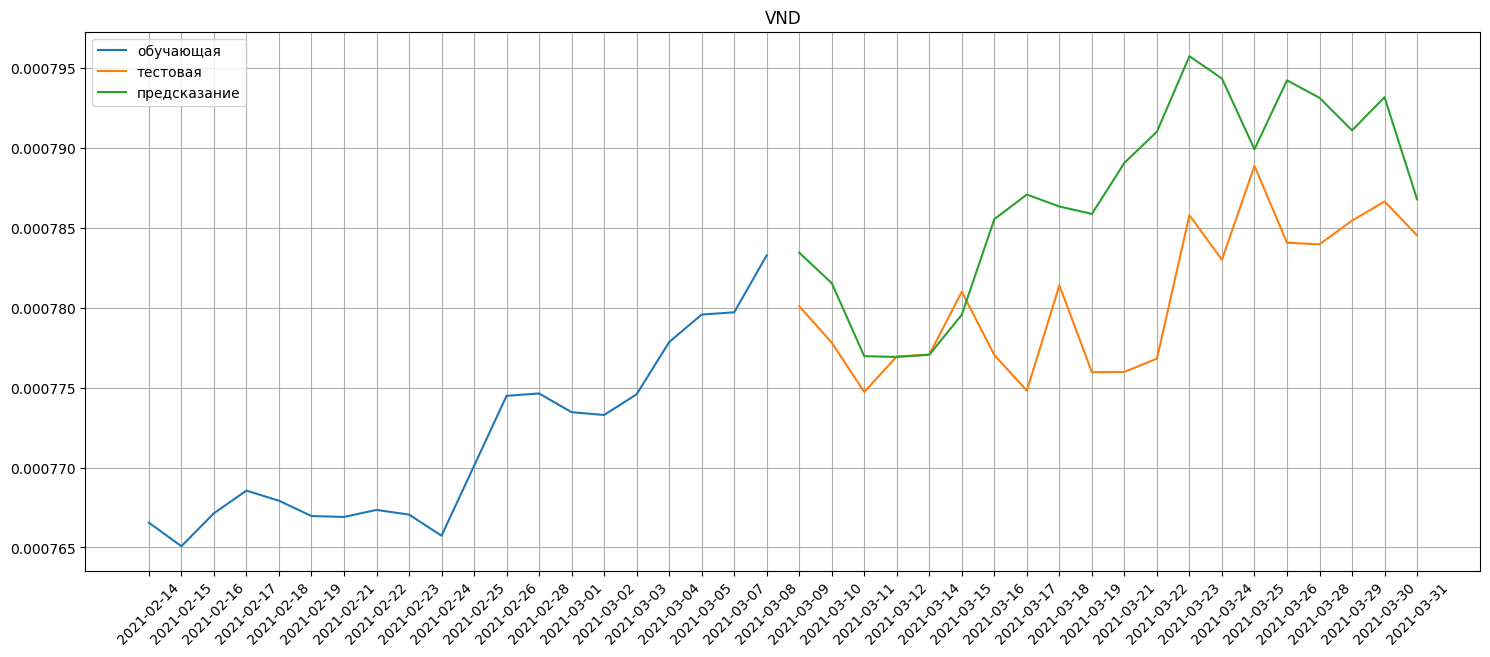


======================================== QAR ========================================
2023-12-04 12:48:02,488 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.5 MiB
2023-12-04 12:48:02,502 - ApiComposer - Initial pipeline was fitted in 8.2 sec.
2023-12-04 12:48:02,516 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-12-04 12:48:02,547 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 56 min. Set of candidate models: ['polyfit', 'ar', 'locf', 'sparse_lagged', 'ets', 'gaussian_filter', 'clstm', 'arima', 'lagged', 'smoothing', 'stl_arima', 'glm', 'ts_naive_average', 'cut', 'diff_filter', 'exog_ts', 'ets', 'gaussian_filter', 'scaling', 'poly_features', 'ts_naive_average', 'isolation_forest_reg', 'sparse_lagged', 'adareg', 'lagged', 'stl_arima', 'ransac_non_lin_reg', 'dtreg', 'treg', 'cut', 'ar', 'clstm', 'lgbmreg', 'normalization', 'linear

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-12-04 13:15:25,797 - GroupedCondition - Optimisation finished: Early stopping timeout criteria was satisfied


Generations:   0%|          | 1/10000 [27:23<?, ?gen/s]

2023-12-04 13:15:25,822 - ApiComposer - Hyperparameters tuning started with 28 min. timeout


2023-12-04 13:15:45,336 - PipelineTuner - Initial pipeline: {'depth': 7, 'length': 8, 'nodes': [linear, ridge, ridge, glm, data_source_ts/QAR, ridge, lagged, fast_ica]}
linear - {}
ridge - {'alpha': 8.641918967501484}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/QAR - {}
ridge - {'alpha': 3.158049690061106}
lagged - {'window_size': 10}
fast_ica - {'whiten': 'unit-variance'} 
Initial metric: 0.030
  0%|          | 60/100000 [24:13<806:54:47, 29.07s/trial, best loss: 0.01988061564846659]
2023-12-04 13:44:44,316 - PipelineTuner - Final pipeline: {'depth': 7, 'length': 8, 'nodes': [linear, ridge, ridge, glm, data_source_ts/QAR, ridge, lagged, fast_ica]}
linear - {}
ridge - {'alpha': 5.2270844656499555}
ridge - {'alpha': 8.423667716517457}
glm - {'family': 'inverse_gaussian', 'link': 'inverse_power'}
data_source_ts/QAR - {}
ridge - {'alpha': 9.038565205973372}
lagged - {'window_size': 144}
fast_ica - {'whiten': 'unit-variance', 'fun': 'cube', 'n_components': 11

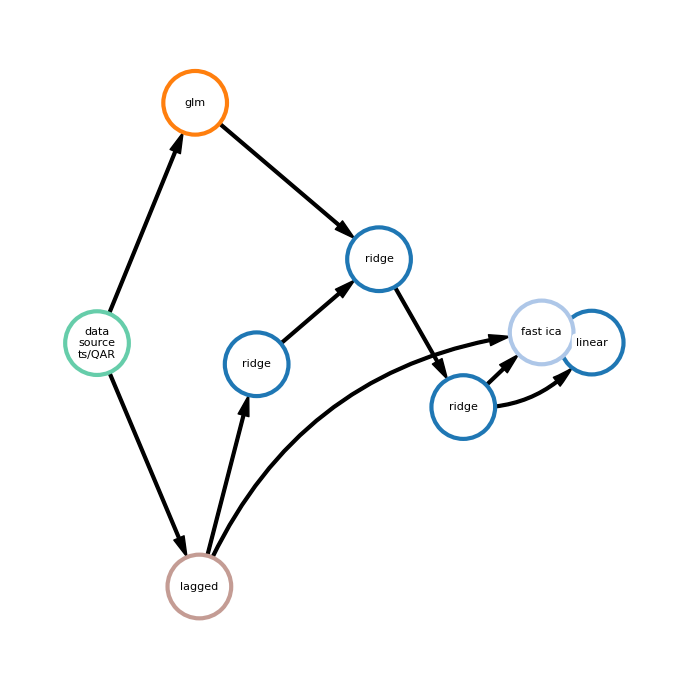

[5.13856655 5.13755661 5.13777065 5.13849862 5.14485064 5.14241621
 5.14095879 5.14095813 5.14388698 5.14925617 5.15169944 5.1570732
 5.15268177]
{'mae': 0.039, 'mape': 0.008}


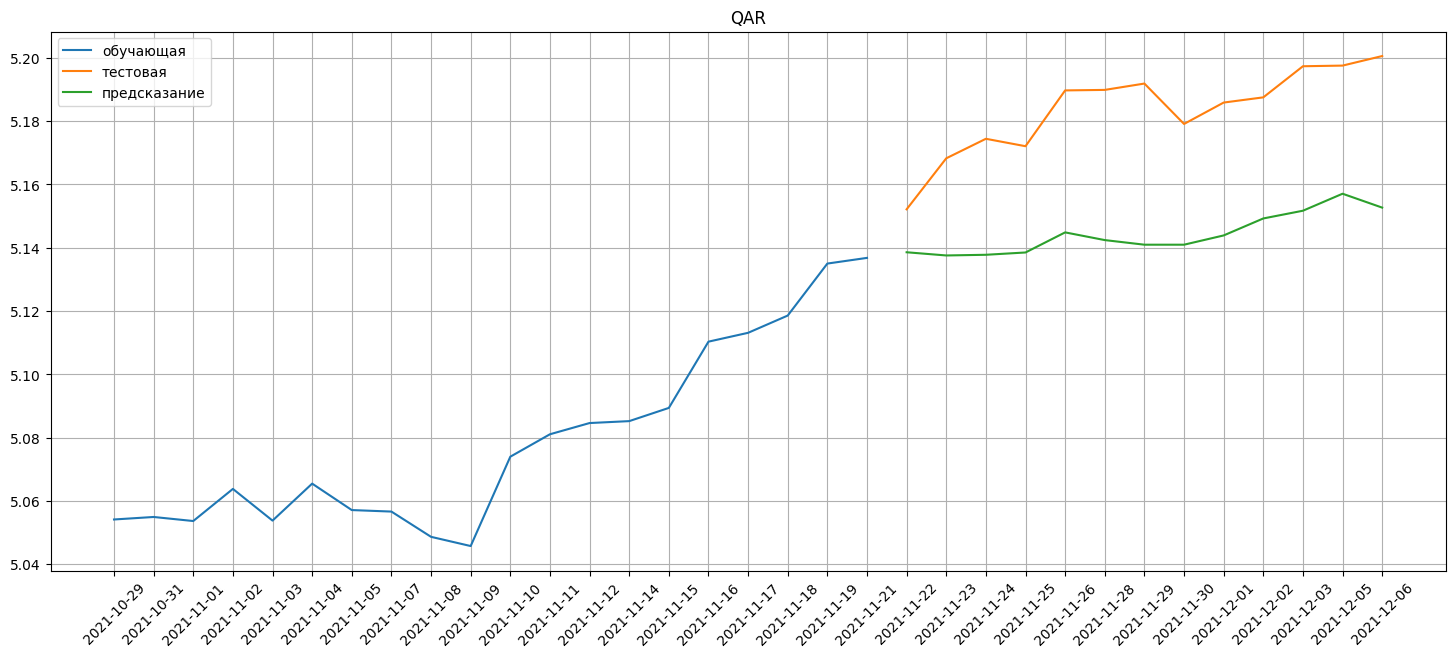


======================================== KZT ========================================
2023-12-04 13:45:41,184 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.4 MiB
2023-12-04 13:45:41,187 - ApiComposer - Initial pipeline was fitted in 9.5 sec.
2023-12-04 13:45:41,191 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-12-04 13:45:41,212 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 38 min. Set of candidate models: ['polyfit', 'ar', 'locf', 'sparse_lagged', 'ets', 'gaussian_filter', 'clstm', 'arima', 'lagged', 'smoothing', 'stl_arima', 'glm', 'ts_naive_average', 'cut', 'diff_filter', 'exog_ts', 'ets', 'gaussian_filter', 'scaling', 'poly_features', 'ts_naive_average', 'isolation_forest_reg', 'sparse_lagged', 'adareg', 'lagged', 'stl_arima', 'ransac_non_lin_reg', 'dtreg', 'treg', 'cut', 'ar', 'clstm', 'lgbmreg', 'normalization', 'linear

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-12-04 14:07:37,431 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [21:56<?, ?gen/s]

2023-12-04 14:07:37,450 - ApiComposer - Hyperparameters tuning started with 16 min. timeout


2023-12-04 14:07:56,794 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [rfr, ridge, ridge, glm, data_source_ts/KZT, ridge, lagged, linear, poly_features]}
rfr - {'n_jobs': -1, 'max_features': 0.8925052522987145, 'min_samples_split': 18, 'min_samples_leaf': 11, 'bootstrap': False}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/KZT - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
poly_features - {'degree': 4, 'interaction_only': False} 
Initial metric: 0.000
  0%|          | 39/100000 [12:21<710:01:06, 25.57s/trial, best loss: 0.00015767155353741164]
2023-12-04 14:23:57,677 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [rfr, ridge, ridge, glm, data_source_ts/KZT, ridge, lagged, linear, poly_features]}
rfr - {'n_jobs': -1, 'max_features': 0.8925052522987145, 'min_samples_split': 18, 'min_samples_leaf': 11, 'bootstrap': False}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}


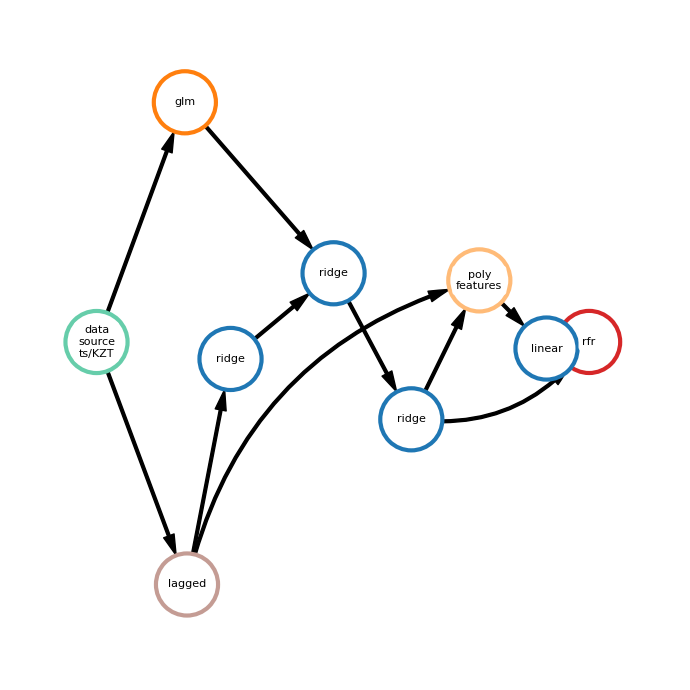

[0.04238227 0.04235909 0.04233826 0.04235456 0.0423633  0.04237621
 0.04237608 0.04234733 0.04234479 0.0423477  0.04239094 0.0424108
 0.04243395 0.0424504  0.0424663 ]
{'mae': 0.0, 'mape': 0.003}


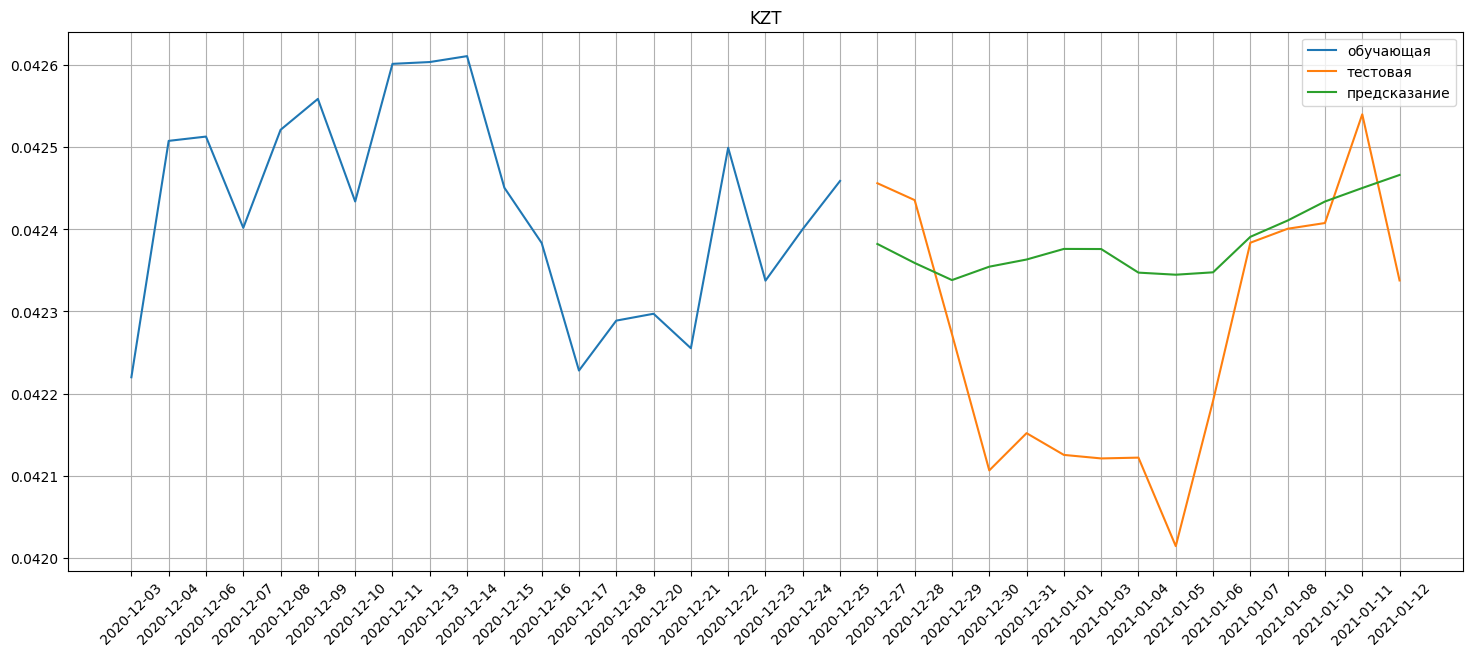


======================================== DKK ========================================
2023-12-04 14:25:14,761 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.6 MiB
2023-12-04 14:25:14,764 - ApiComposer - Initial pipeline was fitted in 14.7 sec.
2023-12-04 14:25:14,767 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-12-04 14:25:14,786 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 38 min. Set of candidate models: ['polyfit', 'ar', 'locf', 'sparse_lagged', 'ets', 'gaussian_filter', 'clstm', 'arima', 'lagged', 'smoothing', 'stl_arima', 'glm', 'ts_naive_average', 'cut', 'diff_filter', 'exog_ts', 'ets', 'gaussian_filter', 'scaling', 'poly_features', 'ts_naive_average', 'isolation_forest_reg', 'sparse_lagged', 'adareg', 'lagged', 'stl_arima', 'ransac_non_lin_reg', 'dtreg', 'treg', 'cut', 'ar', 'clstm', 'lgbmreg', 'normalization', 'linea

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-12-04 14:47:31,445 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [22:16<?, ?gen/s]

2023-12-04 14:47:31,473 - ApiComposer - Hyperparameters tuning started with 15 min. timeout


2023-12-04 14:48:45,957 - PipelineTuner - Initial pipeline: {'depth': 11, 'length': 11, 'nodes': [gbr, rfr, dtreg, ridge, ridge, lagged, data_source_ts/DKK, linear, decompose, linear, decompose]}
gbr - {}
rfr - {'n_jobs': -1}
dtreg - {}
ridge - {'alpha': 6.76328749399465}
ridge - {'alpha': 6.76328749399465}
lagged - {'window_size': 10}
data_source_ts/DKK - {}
linear - {}
decompose - {}
linear - {}
decompose - {} 
Initial metric: 0.006
100%|██████████| 10/10 [15:10<00:00, 91.09s/trial, best loss: 0.010801083020320155] 
2023-12-04 15:03:56,900 - PipelineTuner - Tuner stopped after initial search due to the lack of time
2023-12-04 15:05:58,679 - PipelineTuner - Final pipeline: {'depth': 11, 'length': 11, 'nodes': [gbr, rfr, dtreg, ridge, ridge, lagged, data_source_ts/DKK, linear, decompose, linear, decompose]}
gbr - {}
rfr - {'n_jobs': -1}
dtreg - {}
ridge - {'alpha': 6.76328749399465}
ridge - {'alpha': 6.76328749399465}
lagged - {'window_size': 10}
data_source_ts/DKK - {}
linear - {}
dec

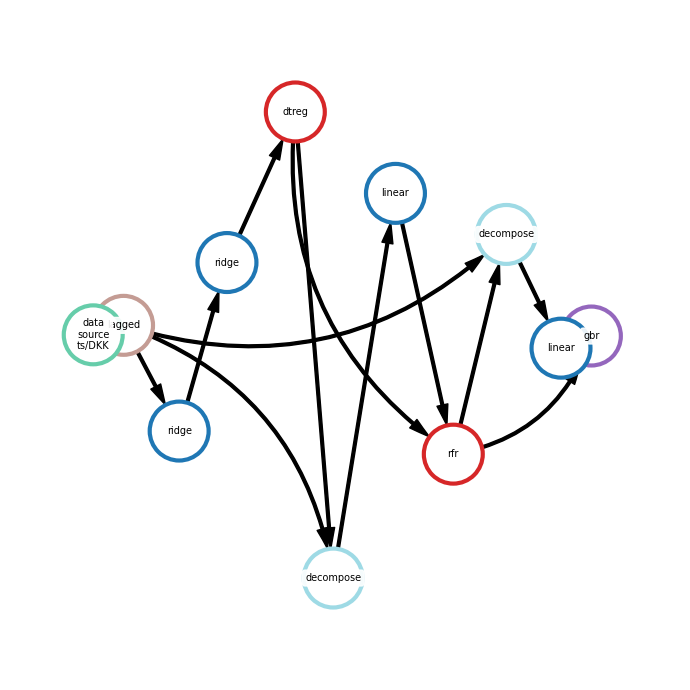

[2.89212449 2.89232233 2.89310151 2.89959747 2.90679873 2.9116351
 2.90579207 2.90411413 2.89914432 2.89635968 2.90370632 2.90747523
 2.911258   2.91222991]
{'mae': 0.035, 'mape': 0.012}


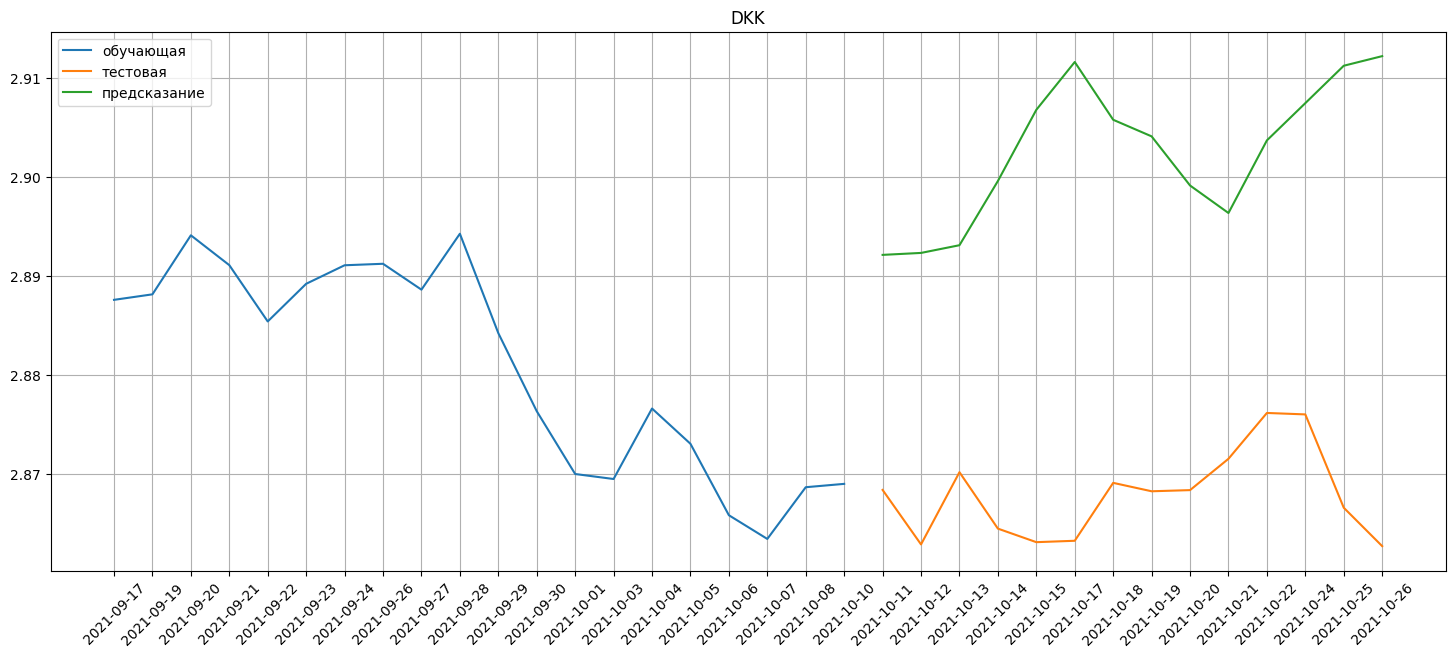


======================================== PKR ========================================
2023-12-04 15:09:18,038 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 2.7 MiB
2023-12-04 15:09:18,045 - ApiComposer - Initial pipeline was fitted in 14.7 sec.
2023-12-04 15:09:18,050 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-12-04 15:09:18,084 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 55 min. Set of candidate models: ['polyfit', 'ar', 'locf', 'sparse_lagged', 'ets', 'gaussian_filter', 'clstm', 'arima', 'lagged', 'smoothing', 'stl_arima', 'glm', 'ts_naive_average', 'cut', 'diff_filter', 'exog_ts', 'ets', 'gaussian_filter', 'scaling', 'poly_features', 'ts_naive_average', 'isolation_forest_reg', 'sparse_lagged', 'adareg', 'lagged', 'stl_arima', 'ransac_non_lin_reg', 'dtreg', 'treg', 'cut', 'ar', 'clstm', 'lgbmreg', 'normalization', 'linea

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-12-04 15:41:32,753 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [32:14<?, ?gen/s]

2023-12-04 15:41:32,775 - ApiComposer - Hyperparameters tuning started with 23 min. timeout


2023-12-04 15:41:43,530 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 3, 'nodes': [rfr, ets, data_source_ts/PKR]}
rfr - {'n_jobs': -1, 'max_features': 0.7601341007341466, 'min_samples_split': 10, 'min_samples_leaf': 11, 'bootstrap': True}
ets - {'error': 'mul', 'trend': None, 'seasonal': 'add', 'damped_trend': False, 'seasonal_periods': 63.89056261695656}
data_source_ts/PKR - {} 
Initial metric: 0.000
  0%|          | 294/100000 [22:20<126:40:37,  4.57s/trial, best loss: 0.00012484346677176878]
2023-12-04 16:04:16,901 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [rfr, ets, data_source_ts/PKR]}
rfr - {'n_jobs': -1, 'bootstrap': True, 'max_features': 0.7586109135694326, 'min_samples_leaf': 15, 'min_samples_split': 17}
ets - {'error': 'mul', 'trend': 'mul', 'seasonal': None, 'damped_trend': True, 'seasonal_periods': 96.02613561906864}
data_source_ts/PKR - {}
2023-12-04 16:04:16,904 - PipelineTuner - Final metric: 0.000
2023-12-04 16:04:16,919 - ApiComp

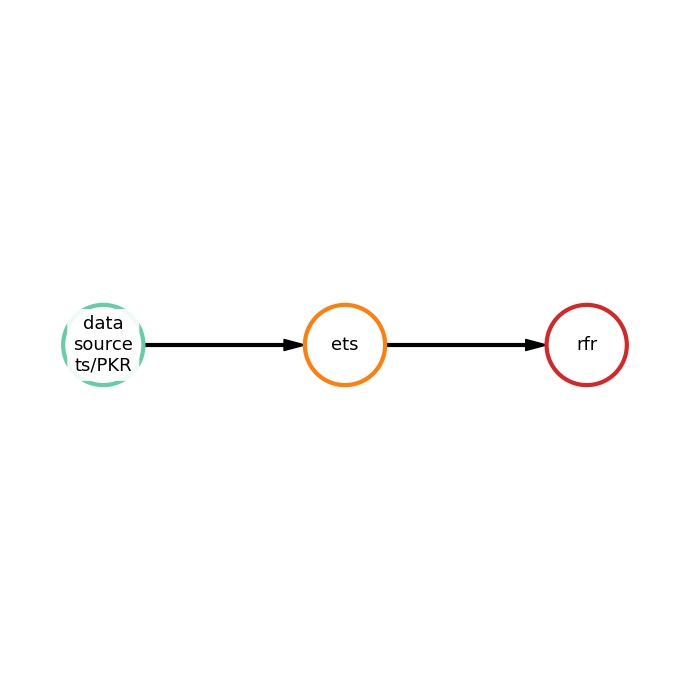

[0.09181784 0.09167645 0.0915923  0.09158309 0.09160388 0.09161572]
{'mae': 0.001, 'mape': 0.007}


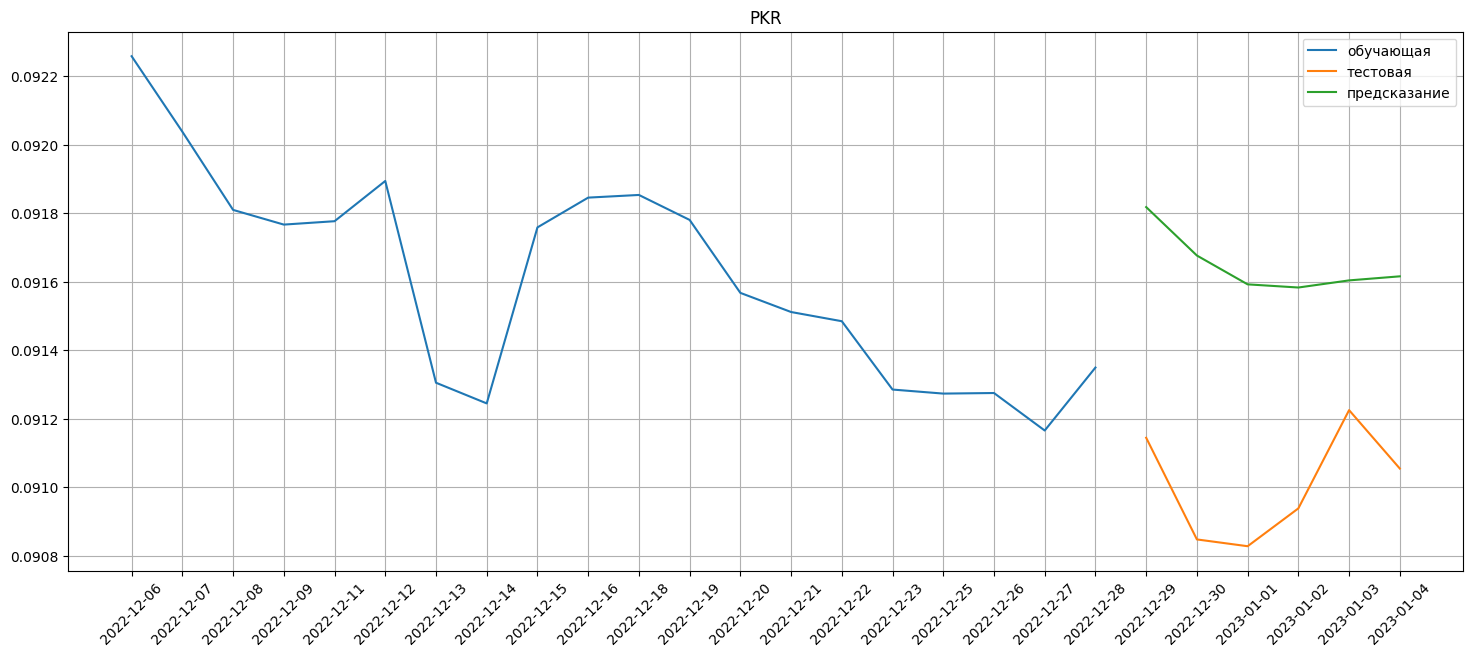


======================================== KWD ========================================
2023-12-04 16:07:08,069 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 2.5 MiB
2023-12-04 16:07:08,077 - ApiComposer - Initial pipeline was fitted in 7.0 sec.
2023-12-04 16:07:08,080 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-12-04 16:07:08,100 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 3 min. Set of candidate models: ['polyfit', 'ar', 'locf', 'sparse_lagged', 'ets', 'gaussian_filter', 'clstm', 'arima', 'lagged', 'smoothing', 'stl_arima', 'glm', 'ts_naive_average', 'cut', 'diff_filter', 'exog_ts', 'ets', 'gaussian_filter', 'scaling', 'poly_features', 'ts_naive_average', 'isolation_forest_reg', 'sparse_lagged', 'adareg', 'lagged', 'stl_arima', 'ransac_non_lin_reg', 'dtreg', 'treg', 'cut', 'ar', 'clstm', 'lgbmreg', 'normalization', 'linear'

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-12-04 16:08:57,410 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [01:49<?, ?gen/s]

2023-12-04 16:08:57,453 - ApiComposer - Hyperparameters tuning started with 1 min. timeout


2023-12-04 16:09:30,842 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [rfr, ridge, ridge, glm, data_source_ts/KWD, ridge, lagged, linear, decompose]}
rfr - {'n_jobs': -1}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/KWD - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.059
 30%|███       | 3/10 [01:13<02:51, 24.50s/trial, best loss: 0.06854644050200404]
2023-12-04 16:10:44,410 - PipelineTuner - Tuner stopped after initial search due to the lack of time
2023-12-04 16:11:06,600 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [rfr, ridge, ridge, glm, data_source_ts/KWD, ridge, lagged, linear, decompose]}
rfr - {'n_jobs': -1}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/KWD - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {}
2023-12-04 16:11:06,604 - PipelineTuner - Final metric: 0.059
2023-12-04 16:11:0

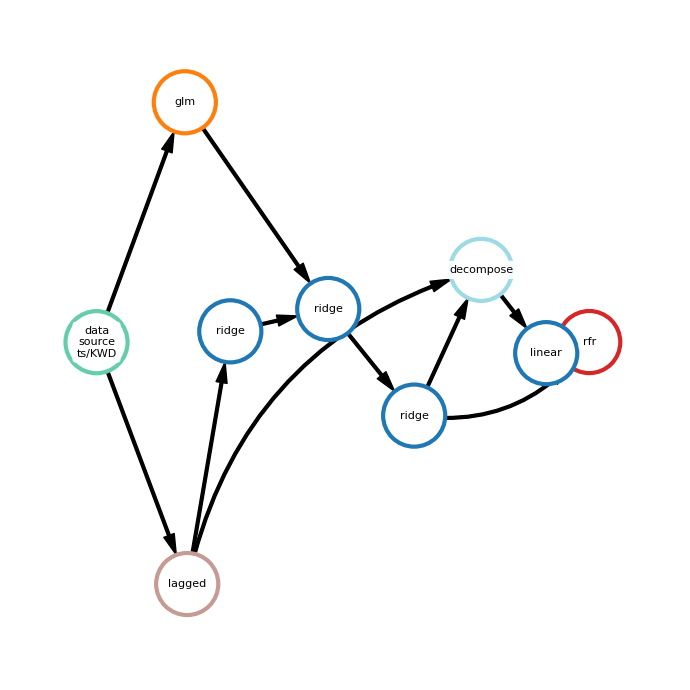

[59.21953126 59.19321884 59.20801689 59.17555221 59.15957491 59.11399916
 59.10275887]
{'mae': 0.075, 'mape': 0.001}


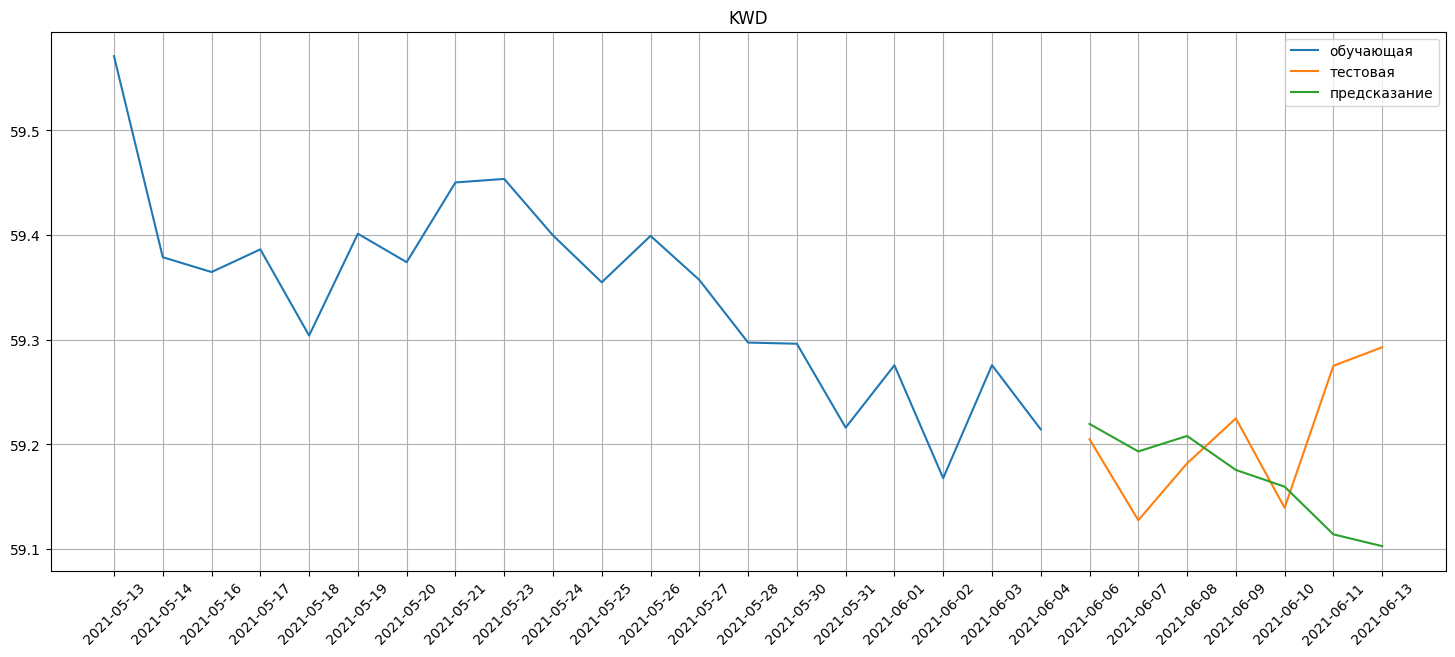


======================================== QAR ========================================
2023-12-04 16:11:49,816 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 2.4 MiB
2023-12-04 16:11:49,820 - ApiComposer - Initial pipeline was fitted in 15.4 sec.
2023-12-04 16:11:49,825 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-12-04 16:11:49,847 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 50 min. Set of candidate models: ['polyfit', 'ar', 'locf', 'sparse_lagged', 'ets', 'gaussian_filter', 'clstm', 'arima', 'lagged', 'smoothing', 'stl_arima', 'glm', 'ts_naive_average', 'cut', 'diff_filter', 'exog_ts', 'ets', 'gaussian_filter', 'scaling', 'poly_features', 'ts_naive_average', 'isolation_forest_reg', 'sparse_lagged', 'adareg', 'lagged', 'stl_arima', 'ransac_non_lin_reg', 'dtreg', 'treg', 'cut', 'ar', 'clstm', 'lgbmreg', 'normalization', 'linea

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-12-04 16:41:40,577 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [29:50<?, ?gen/s]

2023-12-04 16:41:40,601 - ApiComposer - Hyperparameters tuning started with 20 min. timeout


2023-12-04 16:41:49,645 - PipelineTuner - Initial pipeline: {'depth': 4, 'length': 5, 'nodes': [ridge, lagged, data_source_ts/QAR, scaling, glm]}
ridge - {'alpha': 0.6834623352615388}
lagged - {'window_size': 7.142716954473889}
data_source_ts/QAR - {}
scaling - {}
glm - {'family': 'inverse_gaussian', 'link': 'identity'} 
Initial metric: 0.010
  0%|          | 82/100000 [18:10<420:11:25, 15.14s/trial, best loss: 0.010463314720245694]
2023-12-04 17:01:49,566 - PipelineTuner - Final pipeline: {'depth': 4, 'length': 5, 'nodes': [ridge, lagged, data_source_ts/QAR, scaling, glm]}
ridge - {'alpha': 0.6834623352615388}
lagged - {'window_size': 7.142716954473889}
data_source_ts/QAR - {}
scaling - {}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
2023-12-04 17:01:49,569 - PipelineTuner - Final metric: 0.010
2023-12-04 17:01:49,574 - ApiComposer - Hyperparameters tuning finished
2023-12-04 17:01:49,994 - ApiComposer - Model generation finished
2023-12-04 17:02:02,803 - FEDOT logger - Fi

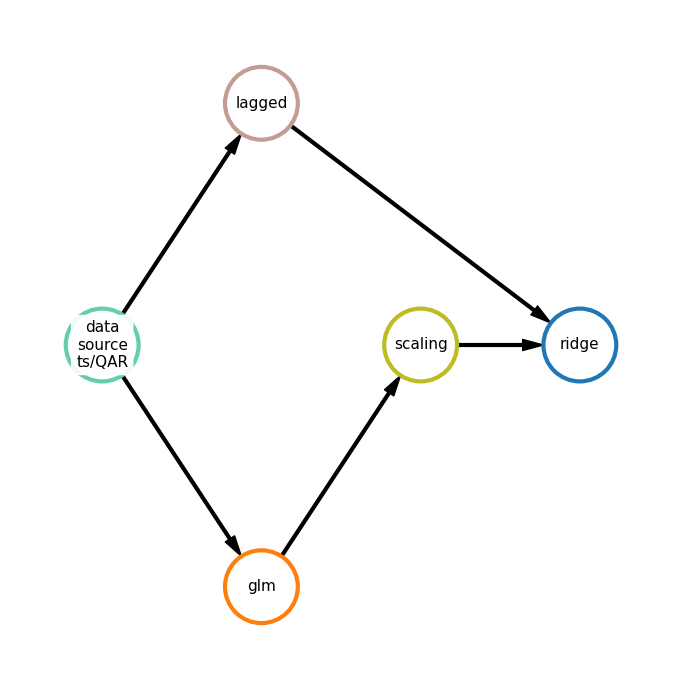

[5.92952997 5.9287865  5.9286117 ]
{'mae': 0.005, 'mape': 0.001}


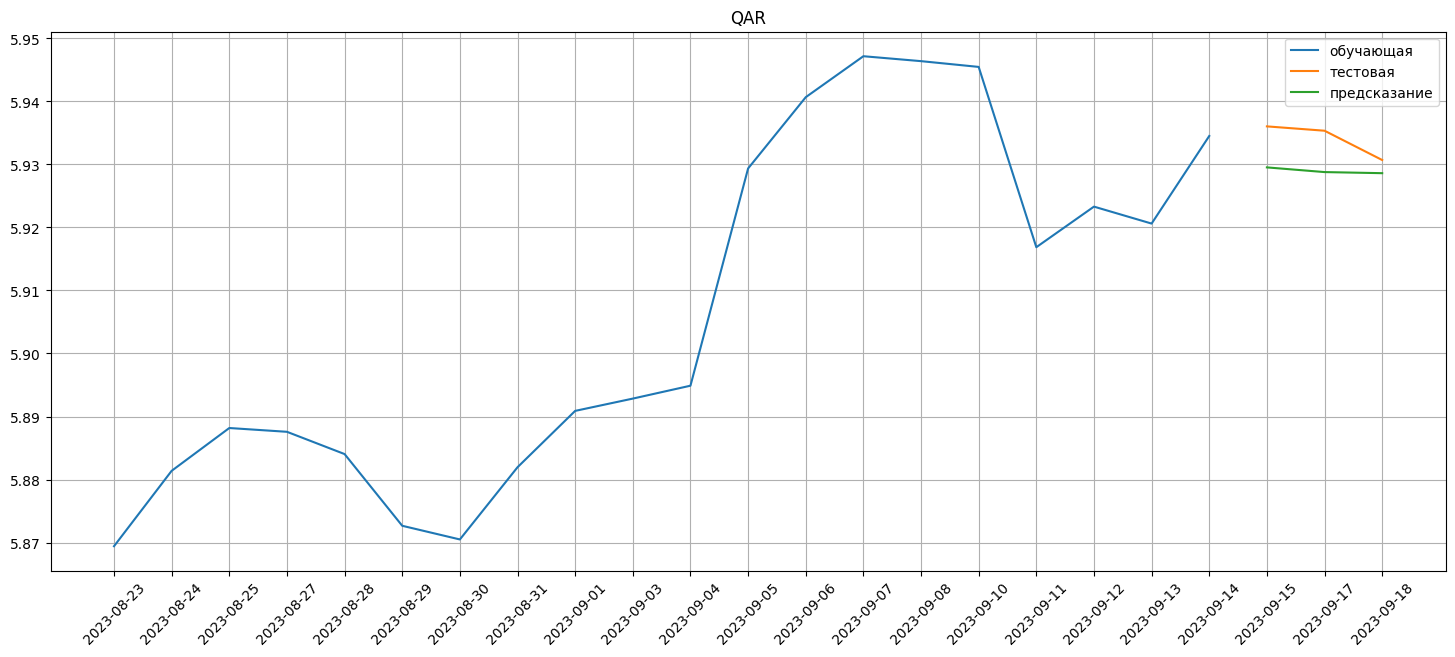


======================================== CLP ========================================
2023-12-04 17:06:13,451 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.1 MiB
2023-12-04 17:06:13,455 - ApiComposer - Initial pipeline was fitted in 10.6 sec.
2023-12-04 17:06:13,457 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-12-04 17:06:13,478 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 30 min. Set of candidate models: ['polyfit', 'ar', 'locf', 'sparse_lagged', 'ets', 'gaussian_filter', 'clstm', 'arima', 'lagged', 'smoothing', 'stl_arima', 'glm', 'ts_naive_average', 'cut', 'diff_filter', 'exog_ts', 'ets', 'gaussian_filter', 'scaling', 'poly_features', 'ts_naive_average', 'isolation_forest_reg', 'sparse_lagged', 'adareg', 'lagged', 'stl_arima', 'ransac_non_lin_reg', 'dtreg', 'treg', 'cut', 'ar', 'clstm', 'lgbmreg', 'normalization', 'linea

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-12-04 17:24:26,626 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [18:13<?, ?gen/s]

2023-12-04 17:24:26,654 - ApiComposer - Hyperparameters tuning started with 12 min. timeout


2023-12-04 17:25:26,131 - PipelineTuner - Initial pipeline: {'depth': 11, 'length': 12, 'nodes': [rfr, treg, treg, ridge, glm, data_source_ts/CLP, ridge, sparse_lagged, linear, decompose, linear, decompose]}
rfr - {'n_jobs': -1}
treg - {}
treg - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/CLP - {}
ridge - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False}
linear - {}
decompose - {}
linear - {}
decompose - {} 
Initial metric: 0.000
  0%|          | 11/100000 [01:14<2057:09:54, 74.07s/trial, best loss: 0.0002248412440118068]
2023-12-04 17:38:06,918 - PipelineTuner - Final pipeline: {'depth': 11, 'length': 12, 'nodes': [rfr, treg, treg, ridge, glm, data_source_ts/CLP, ridge, sparse_lagged, linear, decompose, linear, decompose]}
rfr - {'n_jobs': -1}
treg - {}
treg - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/CLP - {}
ridge - {}
sparse_lagged - {'window_size': 10, 'n_com

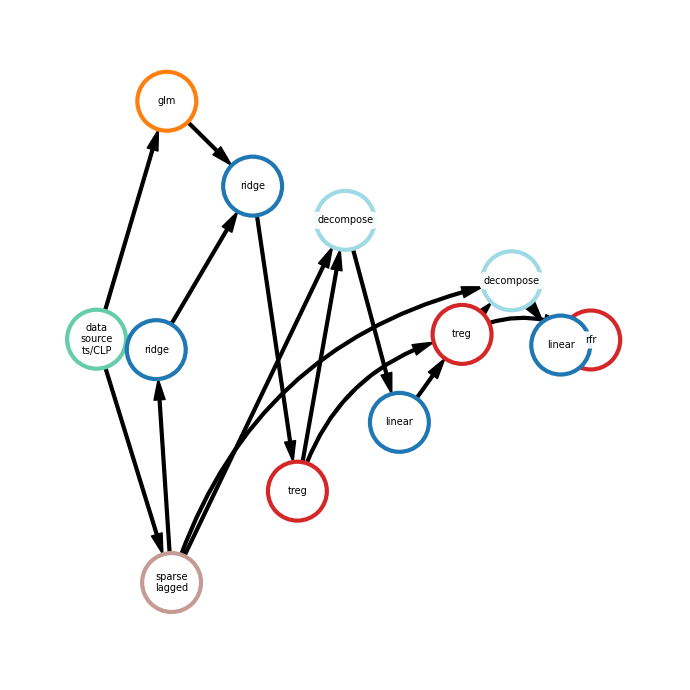

[0.02346222 0.02347444 0.02351094 0.0235431  0.02357289 0.02359245
 0.02355386 0.02350414 0.0234712 ]
{'mae': 0.001, 'mape': 0.023}


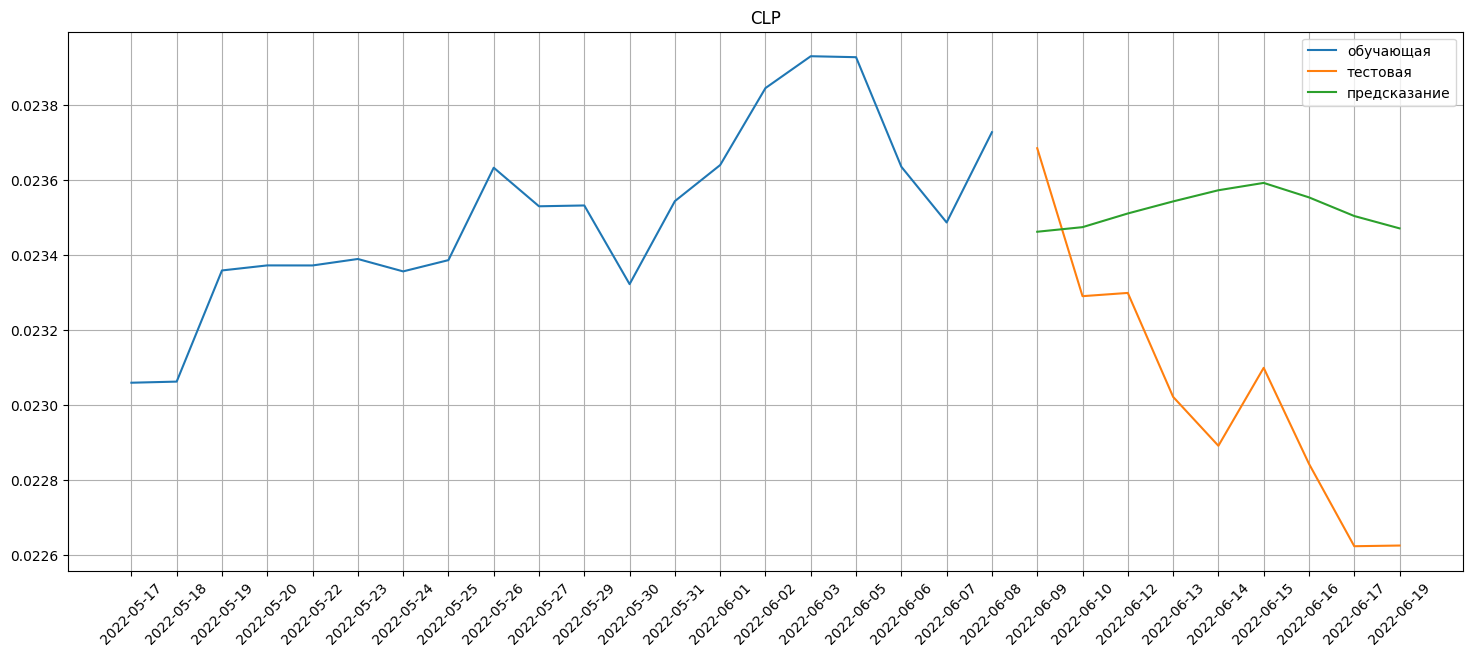


======================================== JPY ========================================
2023-12-04 17:48:48,921 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 4.8 MiB
2023-12-04 17:48:48,935 - ApiComposer - Initial pipeline was fitted in 15.3 sec.
2023-12-04 17:48:48,947 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-12-04 17:48:48,977 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 40 min. Set of candidate models: ['polyfit', 'ar', 'locf', 'sparse_lagged', 'ets', 'gaussian_filter', 'clstm', 'arima', 'lagged', 'smoothing', 'stl_arima', 'glm', 'ts_naive_average', 'cut', 'diff_filter', 'exog_ts', 'ets', 'gaussian_filter', 'scaling', 'poly_features', 'ts_naive_average', 'isolation_forest_reg', 'sparse_lagged', 'adareg', 'lagged', 'stl_arima', 'ransac_non_lin_reg', 'dtreg', 'treg', 'cut', 'ar', 'clstm', 'lgbmreg', 'normalization', 'linea

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-12-04 18:10:46,107 - GroupedCondition - Optimisation finished: Early stopping timeout criteria was satisfied


Generations:   0%|          | 1/10000 [21:57<?, ?gen/s]

2023-12-04 18:10:46,125 - ApiComposer - Hyperparameters tuning started with 18 min. timeout


2023-12-04 18:11:24,230 - PipelineTuner - Initial pipeline: {'depth': 6, 'length': 6, 'nodes': [rfr, ridge, sparse_lagged, data_source_ts/JPY, linear, decompose]}
rfr - {'n_jobs': -1}
ridge - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False}
data_source_ts/JPY - {}
linear - {}
decompose - {} 
Initial metric: 0.001
  0%|          | 22/100000 [11:13<1559:14:05, 56.14s/trial, best loss: 0.0013638319485512285]
2023-12-04 18:29:19,925 - PipelineTuner - Final pipeline: {'depth': 6, 'length': 6, 'nodes': [rfr, ridge, sparse_lagged, data_source_ts/JPY, linear, decompose]}
rfr - {'n_jobs': -1}
ridge - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False}
data_source_ts/JPY - {}
linear - {}
decompose - {}
2023-12-04 18:29:19,928 - PipelineTuner - Final metric: 0.001
2023-12-04 18:29:19,931 - ApiComposer - Hyperparameters tuning finished
2023-12-04 18:29:20,325 - ApiComposer - Model generation 

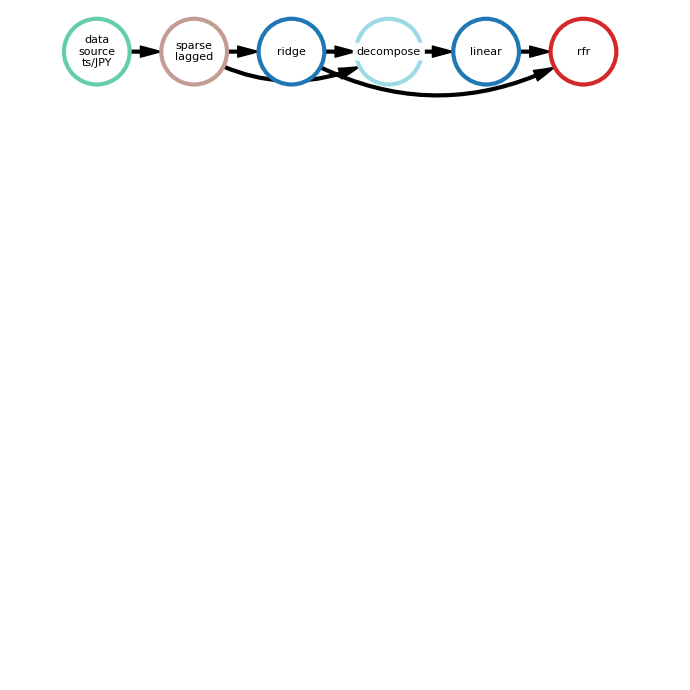

[0.15021936 0.15062278 0.15033193 0.14979783 0.14994223 0.15005908
 0.15042748 0.15062299 0.15094491 0.15100021 0.15117442 0.15164508
 0.15160571 0.15175351 0.15155642 0.15204659 0.15134838]
{'mae': 0.002, 'mape': 0.012}


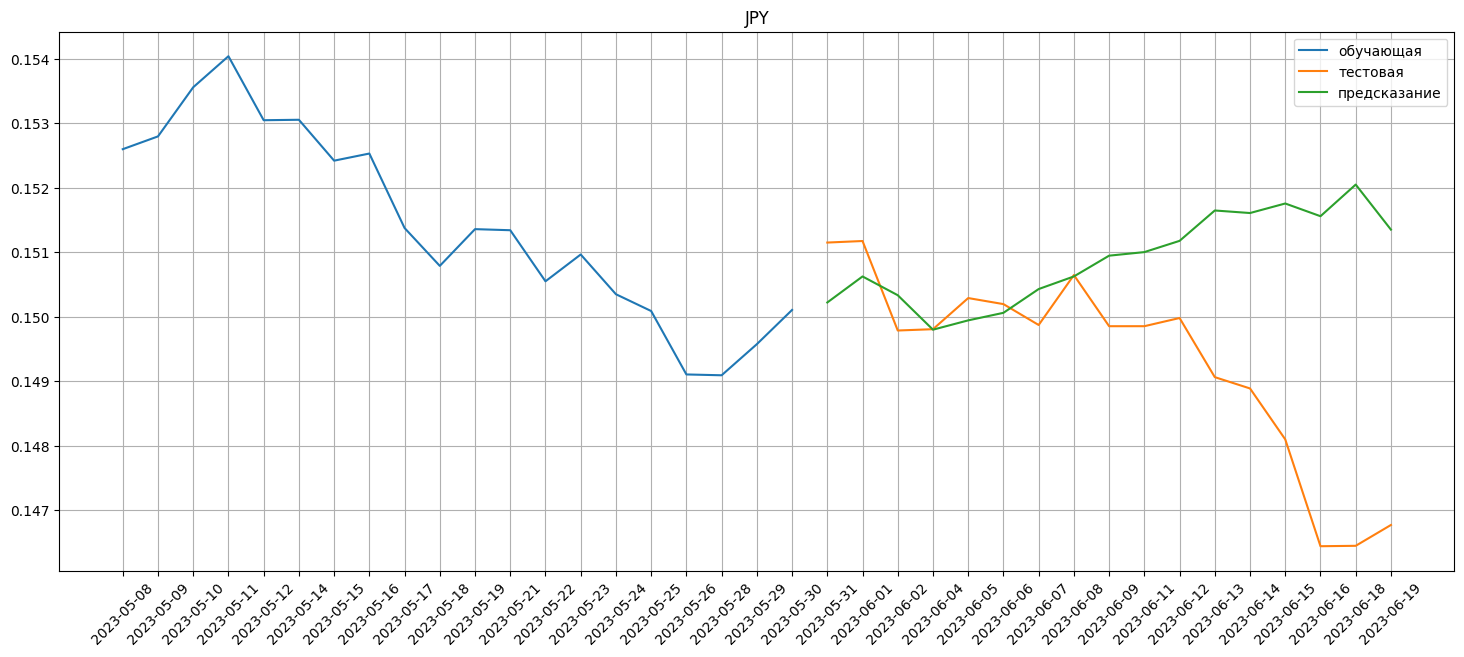


======================================== ARS ========================================
2023-12-04 18:30:39,253 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 4.9 MiB
2023-12-04 18:30:39,257 - ApiComposer - Initial pipeline was fitted in 11.3 sec.
2023-12-04 18:30:39,260 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-12-04 18:30:39,280 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 37 min. Set of candidate models: ['polyfit', 'ar', 'locf', 'sparse_lagged', 'ets', 'gaussian_filter', 'clstm', 'arima', 'lagged', 'smoothing', 'stl_arima', 'glm', 'ts_naive_average', 'cut', 'diff_filter', 'exog_ts', 'ets', 'gaussian_filter', 'scaling', 'poly_features', 'ts_naive_average', 'isolation_forest_reg', 'sparse_lagged', 'adareg', 'lagged', 'stl_arima', 'ransac_non_lin_reg', 'dtreg', 'treg', 'cut', 'ar', 'clstm', 'lgbmreg', 'normalization', 'linea

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-12-04 18:52:35,957 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [21:56<?, ?gen/s]

2023-12-04 18:52:35,977 - ApiComposer - Hyperparameters tuning started with 15 min. timeout


2023-12-04 18:52:43,570 - PipelineTuner - Initial pipeline: {'depth': 5, 'length': 5, 'nodes': [ridge, scaling, ridge, lagged, data_source_ts/ARS]}
ridge - {}
scaling - {}
ridge - {'alpha': 9.88481825147769}
lagged - {'window_size': 10.571174235031524}
data_source_ts/ARS - {} 
Initial metric: 0.001
  0%|          | 73/100000 [13:33<358:34:48, 12.92s/trial, best loss: 0.0007800514762290814]
2023-12-04 19:07:49,727 - PipelineTuner - Final pipeline: {'depth': 5, 'length': 5, 'nodes': [ridge, scaling, ridge, lagged, data_source_ts/ARS]}
ridge - {}
scaling - {}
ridge - {'alpha': 9.88481825147769}
lagged - {'window_size': 10.571174235031524}
data_source_ts/ARS - {}
2023-12-04 19:07:49,734 - PipelineTuner - Final metric: 0.001
2023-12-04 19:07:49,739 - ApiComposer - Hyperparameters tuning finished
2023-12-04 19:07:50,140 - ApiComposer - Model generation finished
2023-12-04 19:08:00,910 - FEDOT logger - Final pipeline was fitted
2023-12-04 19:08:00,914 - FEDOT logger - Final pipeline: {'depth'

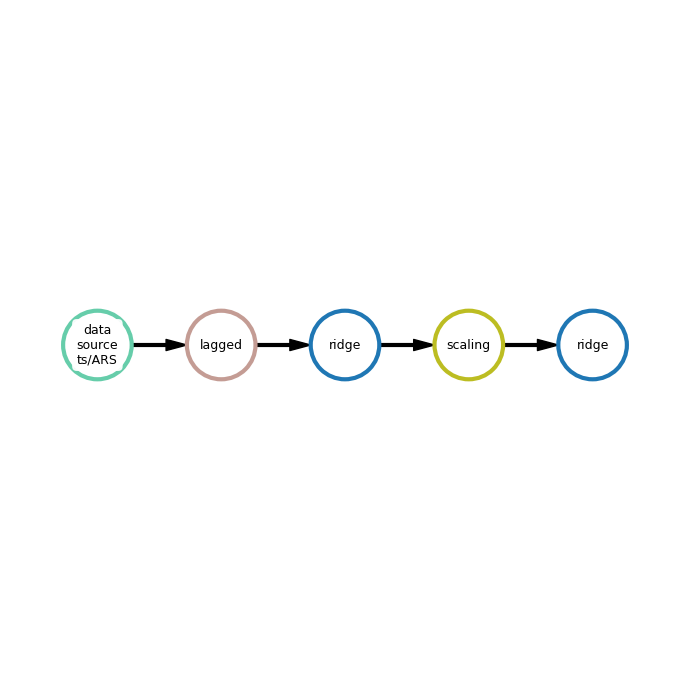

[0.14719553 0.14694069 0.14668533 0.14642736 0.14617029 0.14591805
 0.14567017 0.14542379 0.14518232 0.14494487 0.14471055 0.14447718
 0.14424774 0.14402066 0.14379661 0.14357808 0.14336223 0.14314607
 0.14293008 0.14271265]
{'mae': 0.001, 'mape': 0.006}


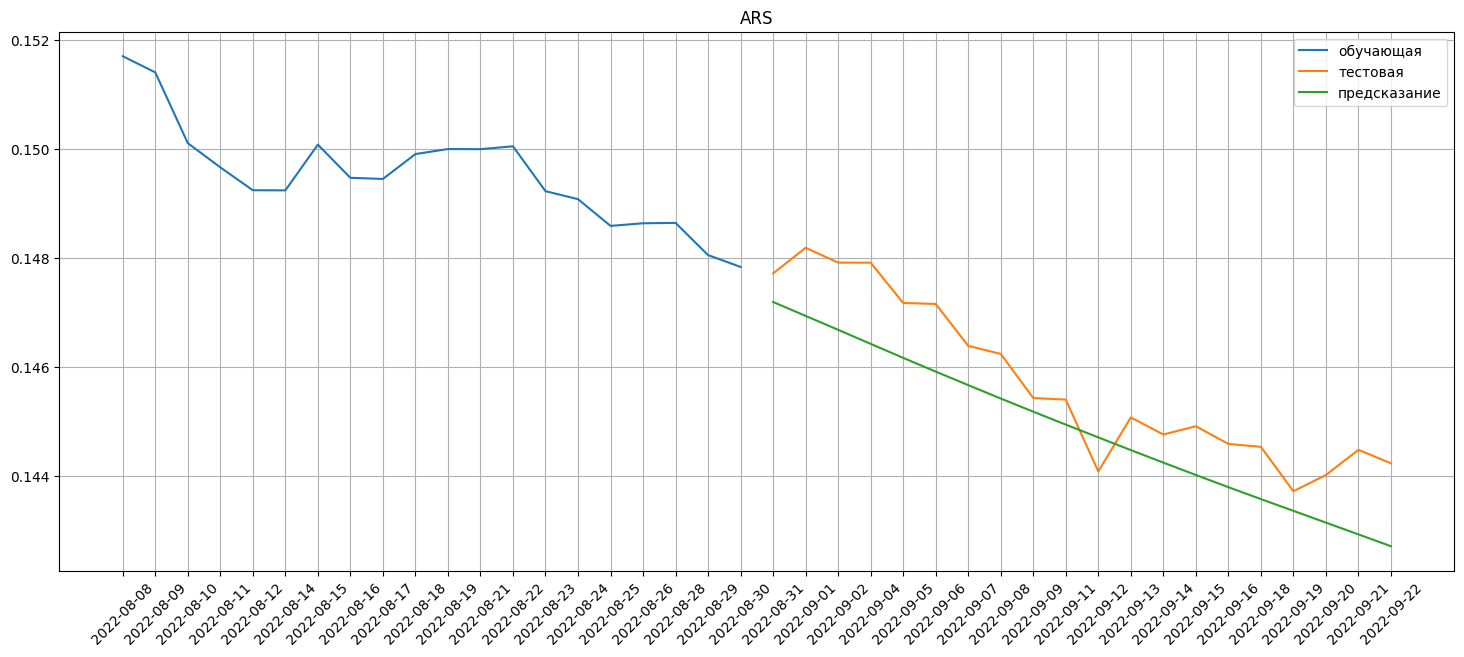


======================================== NOK ========================================
2023-12-04 19:08:45,317 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 4.6 MiB
2023-12-04 19:08:45,324 - ApiComposer - Initial pipeline was fitted in 9.2 sec.
2023-12-04 19:08:45,329 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-12-04 19:08:45,368 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 42 min. Set of candidate models: ['polyfit', 'ar', 'locf', 'sparse_lagged', 'ets', 'gaussian_filter', 'clstm', 'arima', 'lagged', 'smoothing', 'stl_arima', 'glm', 'ts_naive_average', 'cut', 'diff_filter', 'exog_ts', 'ets', 'gaussian_filter', 'scaling', 'poly_features', 'ts_naive_average', 'isolation_forest_reg', 'sparse_lagged', 'adareg', 'lagged', 'stl_arima', 'ransac_non_lin_reg', 'dtreg', 'treg', 'cut', 'ar', 'clstm', 'lgbmreg', 'normalization', 'linear

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-12-04 19:34:43,365 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [25:57<?, ?gen/s]

2023-12-04 19:34:43,390 - ApiComposer - Hyperparameters tuning started with 16 min. timeout


2023-12-04 19:35:10,439 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [rfr, rfr, ridge, glm, data_source_ts/NOK, ridge, sparse_lagged, linear, decompose]}
rfr - {'n_jobs': -1, 'max_features': 0.5804894565783559, 'min_samples_split': 12, 'min_samples_leaf': 11, 'bootstrap': False}
rfr - {'n_jobs': -1}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/NOK - {}
ridge - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False}
linear - {}
decompose - {} 
Initial metric: 0.016
  0%|          | 22/100000 [11:02<1532:21:25, 55.18s/trial, best loss: 0.021230780602537823]
2023-12-04 19:51:21,300 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [rfr, rfr, ridge, glm, data_source_ts/NOK, ridge, sparse_lagged, linear, decompose]}
rfr - {'n_jobs': -1, 'max_features': 0.5804894565783559, 'min_samples_split': 12, 'min_samples_leaf': 11, 'bootstrap': False}
rfr - {'n_jobs': -1}
ridge - {

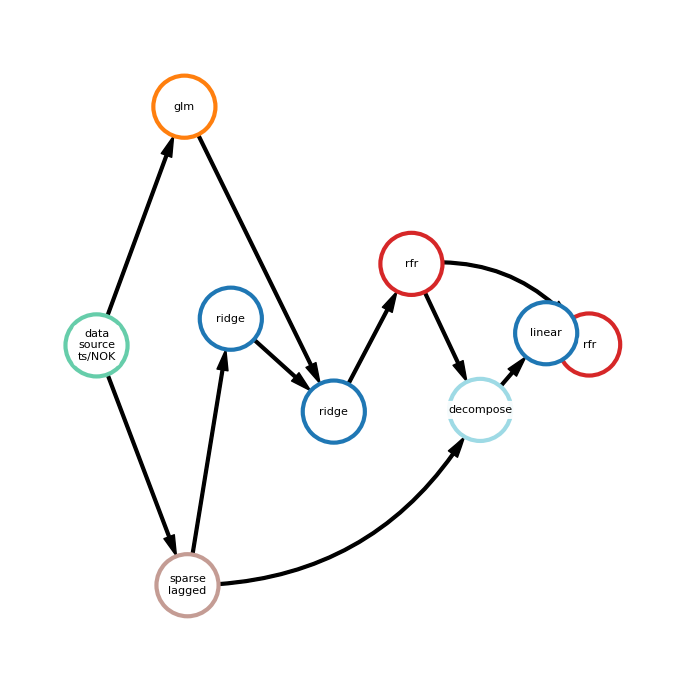

[2.12440293 2.12541859 2.12525808 2.1263238  2.12438945 2.12414671
 2.12540459 2.12583793 2.12576514 2.12757434 2.13101026 2.13337544
 2.13689969 2.13960375 2.13931893 2.13964801 2.14142186 2.14164618
 2.14143276 2.14213307]
{'mae': 0.019, 'mape': 0.009}


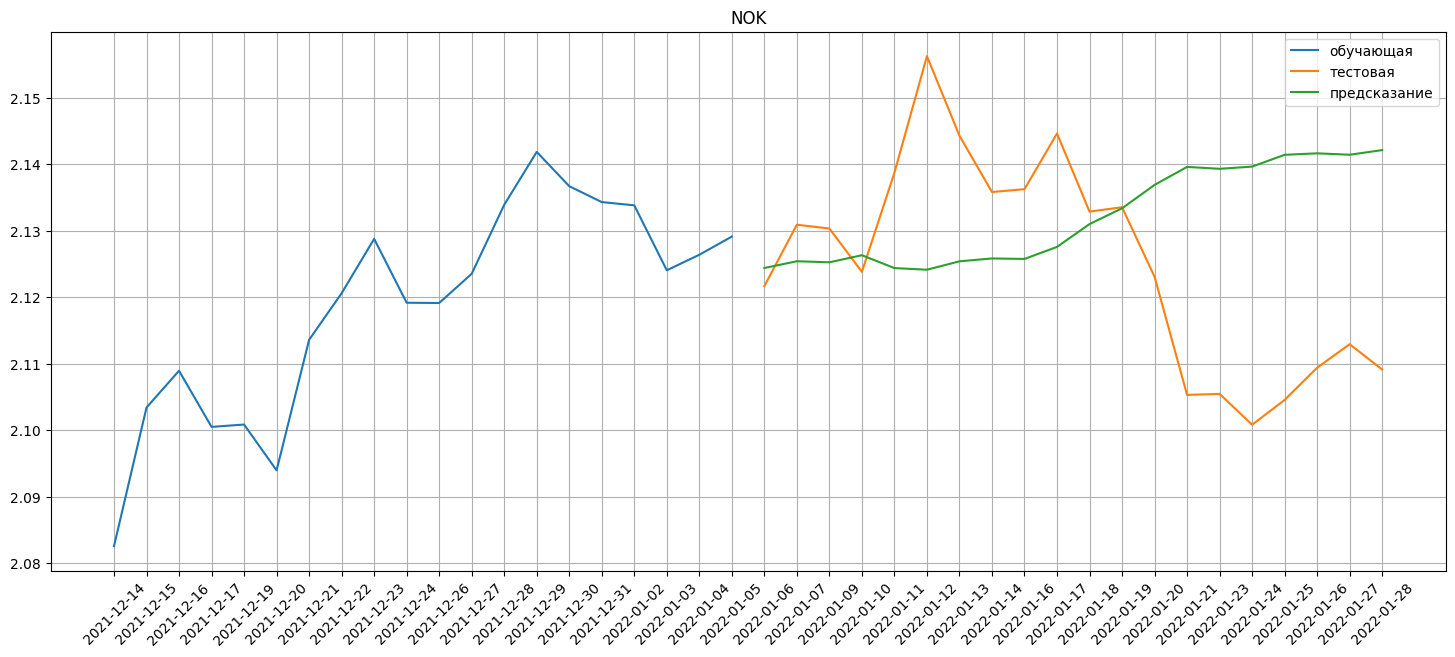


======================================== USD ========================================
2023-12-04 19:54:14,365 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 2.3 MiB
2023-12-04 19:54:14,373 - ApiComposer - Initial pipeline was fitted in 11.2 sec.
2023-12-04 19:54:14,376 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-12-04 19:54:14,399 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 9 min. Set of candidate models: ['polyfit', 'ar', 'locf', 'sparse_lagged', 'ets', 'gaussian_filter', 'clstm', 'arima', 'lagged', 'smoothing', 'stl_arima', 'glm', 'ts_naive_average', 'cut', 'diff_filter', 'exog_ts', 'ets', 'gaussian_filter', 'scaling', 'poly_features', 'ts_naive_average', 'isolation_forest_reg', 'sparse_lagged', 'adareg', 'lagged', 'stl_arima', 'ransac_non_lin_reg', 'dtreg', 'treg', 'cut', 'ar', 'clstm', 'lgbmreg', 'normalization', 'linear

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-12-04 19:59:38,669 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [05:24<?, ?gen/s]

2023-12-04 19:59:38,695 - ApiComposer - Hyperparameters tuning started with 3 min. timeout


2023-12-04 19:59:46,363 - PipelineTuner - Initial pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/USD, ridge, sparse_lagged]}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/USD - {}
ridge - {'alpha': 8.352715837175612}
sparse_lagged - {'window_size': 9.824291569322446, 'n_components': 0.21787947656072032, 'sparse_transform': True, 'use_svd': False} 
Initial metric: 0.021
  0%|          | 18/100000 [02:05<436:25:13, 15.71s/trial, best loss: 0.021560957266152477]
2023-12-04 20:03:23,947 - PipelineTuner - Final pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/USD, ridge, sparse_lagged]}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/USD - {}
ridge - {'alpha': 8.352715837175612}
sparse_lagged - {'window_size': 9.824291569322446, 'n_components': 0.21787947656072032, 'sparse_transform': True, 'use_svd': False}
2023-12-04 20:03:23,950 - PipelineTuner - F

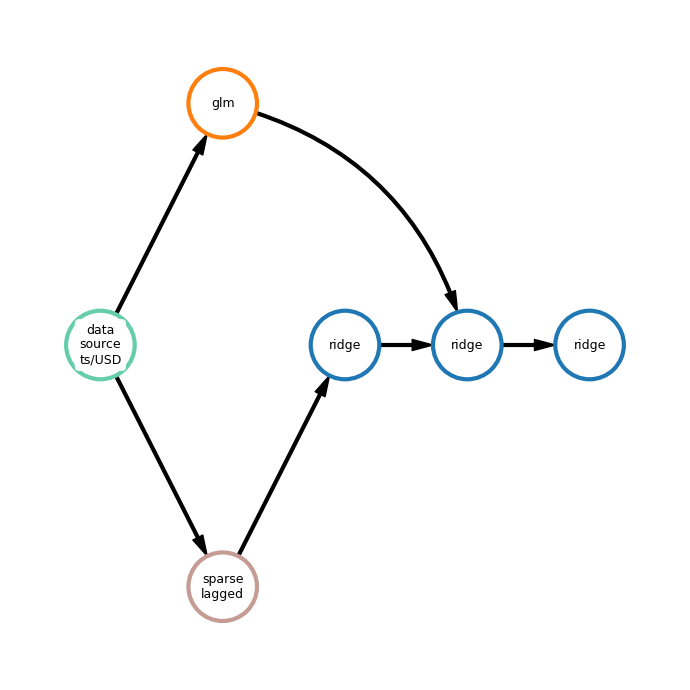

[20.48842707 20.48941686 20.49025999 20.49102951]
{'mae': 0.105, 'mape': 0.005}


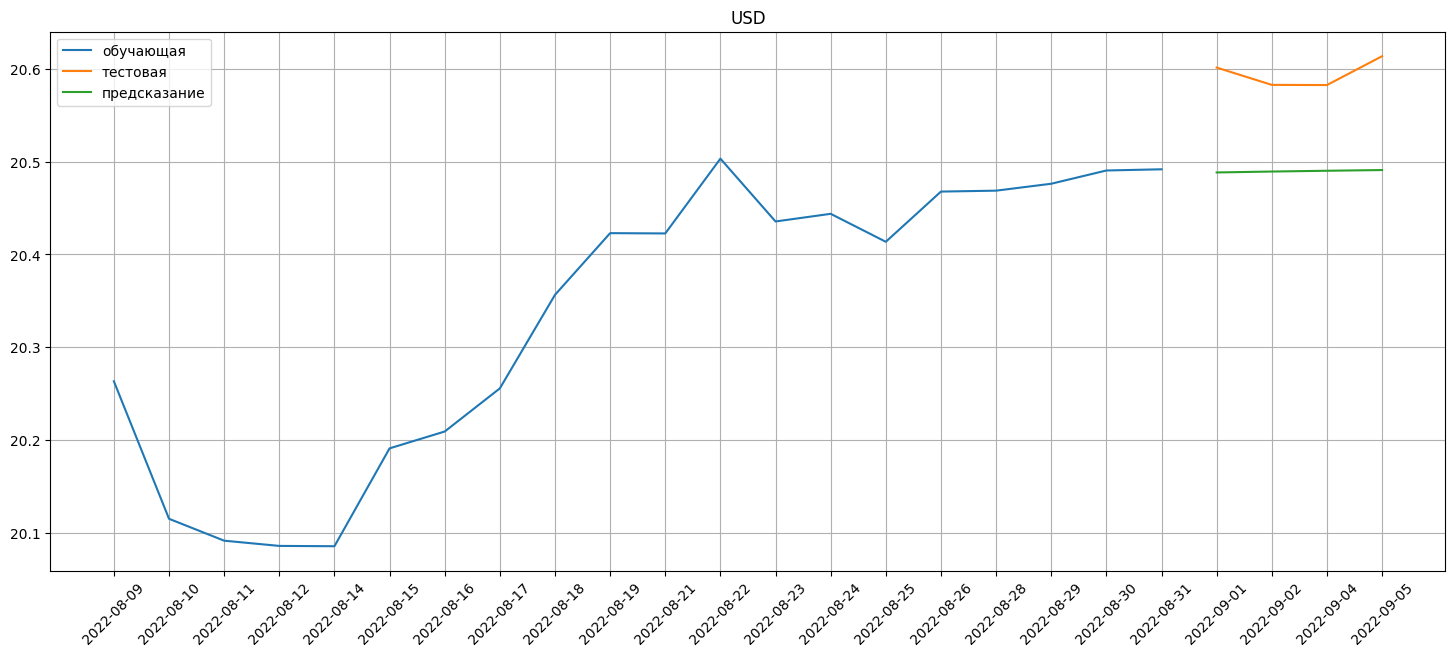


======================================== PLN ========================================
2023-12-04 20:03:57,070 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 2.4 MiB
2023-12-04 20:03:57,074 - ApiComposer - Initial pipeline was fitted in 10.1 sec.
2023-12-04 20:03:57,077 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-12-04 20:03:57,094 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 57 min. Set of candidate models: ['polyfit', 'ar', 'locf', 'sparse_lagged', 'ets', 'gaussian_filter', 'clstm', 'arima', 'lagged', 'smoothing', 'stl_arima', 'glm', 'ts_naive_average', 'cut', 'diff_filter', 'exog_ts', 'ets', 'gaussian_filter', 'scaling', 'poly_features', 'ts_naive_average', 'isolation_forest_reg', 'sparse_lagged', 'adareg', 'lagged', 'stl_arima', 'ransac_non_lin_reg', 'dtreg', 'treg', 'cut', 'ar', 'clstm', 'lgbmreg', 'normalization', 'linea

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-12-04 20:37:59,713 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [34:02<?, ?gen/s]

2023-12-04 20:37:59,737 - ApiComposer - Hyperparameters tuning started with 23 min. timeout


2023-12-04 20:38:08,910 - PipelineTuner - Initial pipeline: {'depth': 6, 'length': 6, 'nodes': [adareg, scaling, scaling, ransac_lin_reg, lagged, data_source_ts/PLN]}
adareg - {}
scaling - {}
scaling - {}
ransac_lin_reg - {'min_samples': 0.4, 'residual_threshold': 10, 'max_trials': 100, 'max_skips': 1000}
lagged - {'window_size': 10.475235511310123}
data_source_ts/PLN - {} 
Initial metric: 0.018
  0%|          | 41/100000 [21:50<1173:21:27, 42.26s/trial, best loss: 0.02342814460179766]
2023-12-04 21:01:58,889 - PipelineTuner - Final pipeline: {'depth': 6, 'length': 6, 'nodes': [adareg, scaling, scaling, ransac_lin_reg, lagged, data_source_ts/PLN]}
adareg - {}
scaling - {}
scaling - {}
ransac_lin_reg - {'min_samples': 0.4, 'residual_threshold': 10, 'max_trials': 100, 'max_skips': 1000}
lagged - {'window_size': 10.475235511310123}
data_source_ts/PLN - {}
2023-12-04 21:01:58,893 - PipelineTuner - Final metric: 0.018
2023-12-04 21:01:58,898 - ApiComposer - Hyperparameters tuning finished
2

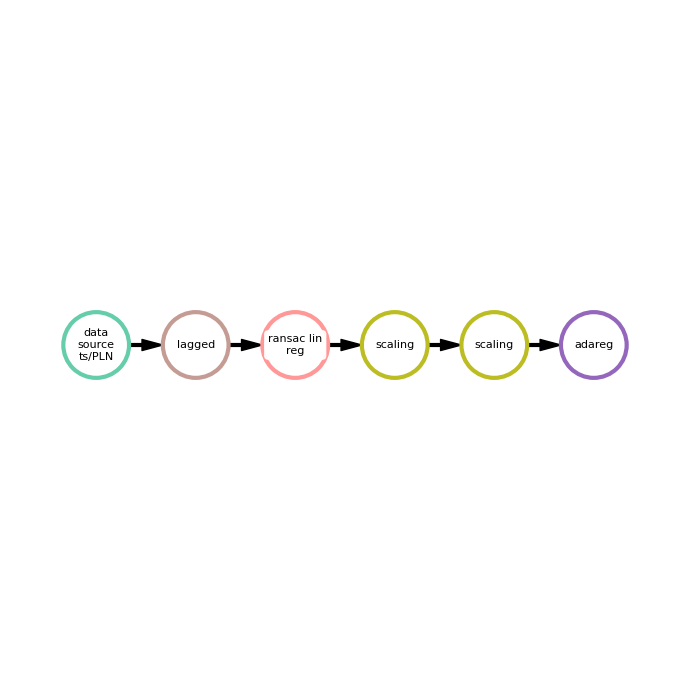

[4.39370732 4.39471692 4.373991   4.40140696 4.39651107]
{'mae': 0.054, 'mape': 0.012}


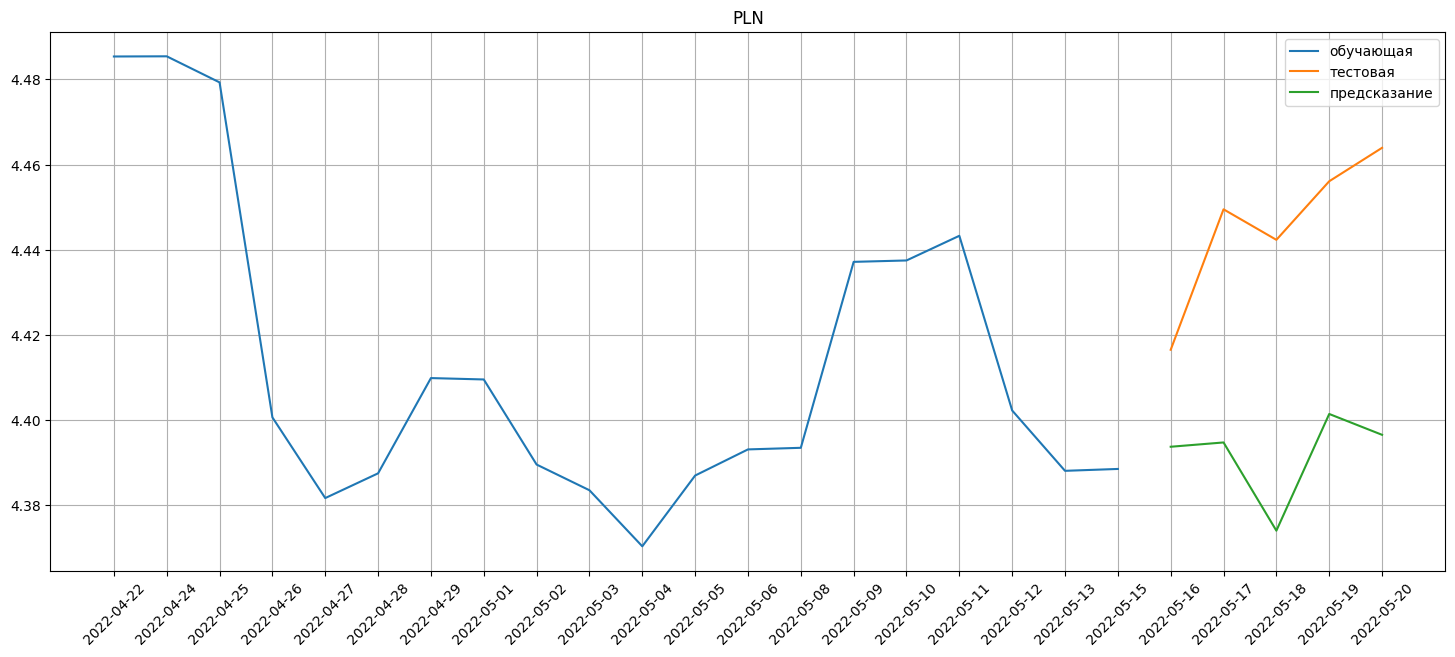


======================================== TWD ========================================
2023-12-04 21:03:04,554 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.1 MiB
2023-12-04 21:03:04,557 - ApiComposer - Initial pipeline was fitted in 8.1 sec.
2023-12-04 21:03:04,569 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-12-04 21:03:04,591 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 38 min. Set of candidate models: ['polyfit', 'ar', 'locf', 'sparse_lagged', 'ets', 'gaussian_filter', 'clstm', 'arima', 'lagged', 'smoothing', 'stl_arima', 'glm', 'ts_naive_average', 'cut', 'diff_filter', 'exog_ts', 'ets', 'gaussian_filter', 'scaling', 'poly_features', 'ts_naive_average', 'isolation_forest_reg', 'sparse_lagged', 'adareg', 'lagged', 'stl_arima', 'ransac_non_lin_reg', 'dtreg', 'treg', 'cut', 'ar', 'clstm', 'lgbmreg', 'normalization', 'linear

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-12-04 21:26:01,651 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [22:57<?, ?gen/s]

2023-12-04 21:26:01,671 - ApiComposer - Hyperparameters tuning started with 15 min. timeout


2023-12-04 21:26:35,069 - PipelineTuner - Initial pipeline: {'depth': 10, 'length': 11, 'nodes': [treg, linear, ridge, ridge, glm, data_source_ts/TWD, ridge, lagged, linear, linear, decompose]}
treg - {}
linear - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/TWD - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
linear - {}
decompose - {} 
Initial metric: 0.002
  0%|          | 18/100000 [08:44<1819:32:33, 65.52s/trial, best loss: 0.001476936921915795]
2023-12-04 21:42:07,601 - PipelineTuner - Final pipeline: {'depth': 10, 'length': 11, 'nodes': [treg, linear, ridge, ridge, glm, data_source_ts/TWD, ridge, lagged, linear, linear, decompose]}
treg - {'bootstrap': False, 'max_features': 0.8094587568551942, 'min_samples_leaf': 1, 'min_samples_split': 8}
linear - {}
ridge - {'alpha': 5.106958205731283}
ridge - {'alpha': 9.510270200357095}
glm - {'family': 'gaussian', 'link': 'inverse_power'}
data_source_ts/TWD - {}
ridge - {'alpha': 2.6279641

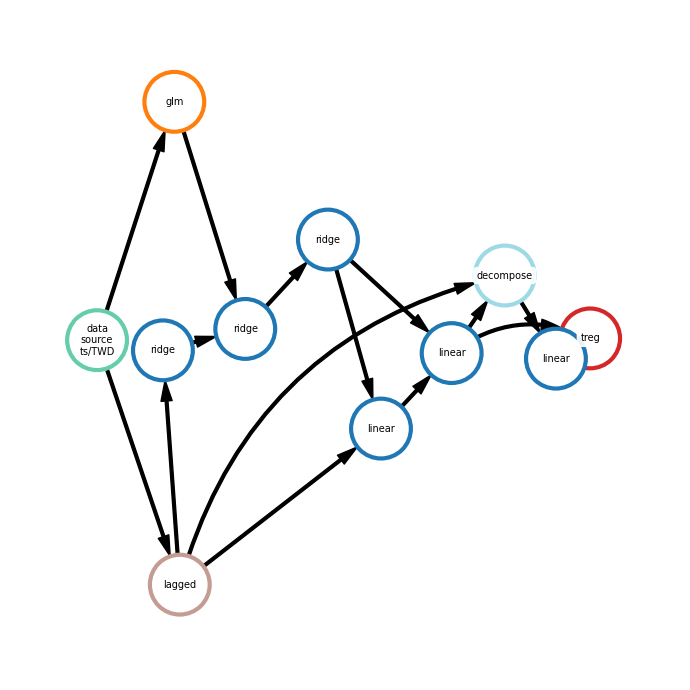

[0.63778588 0.63744913 0.63773022 0.63800774 0.63781416 0.63796419
 0.63786913 0.63751162 0.63734798 0.63703626 0.63677879 0.63684356
 0.63632982]
{'mae': 0.002, 'mape': 0.003}


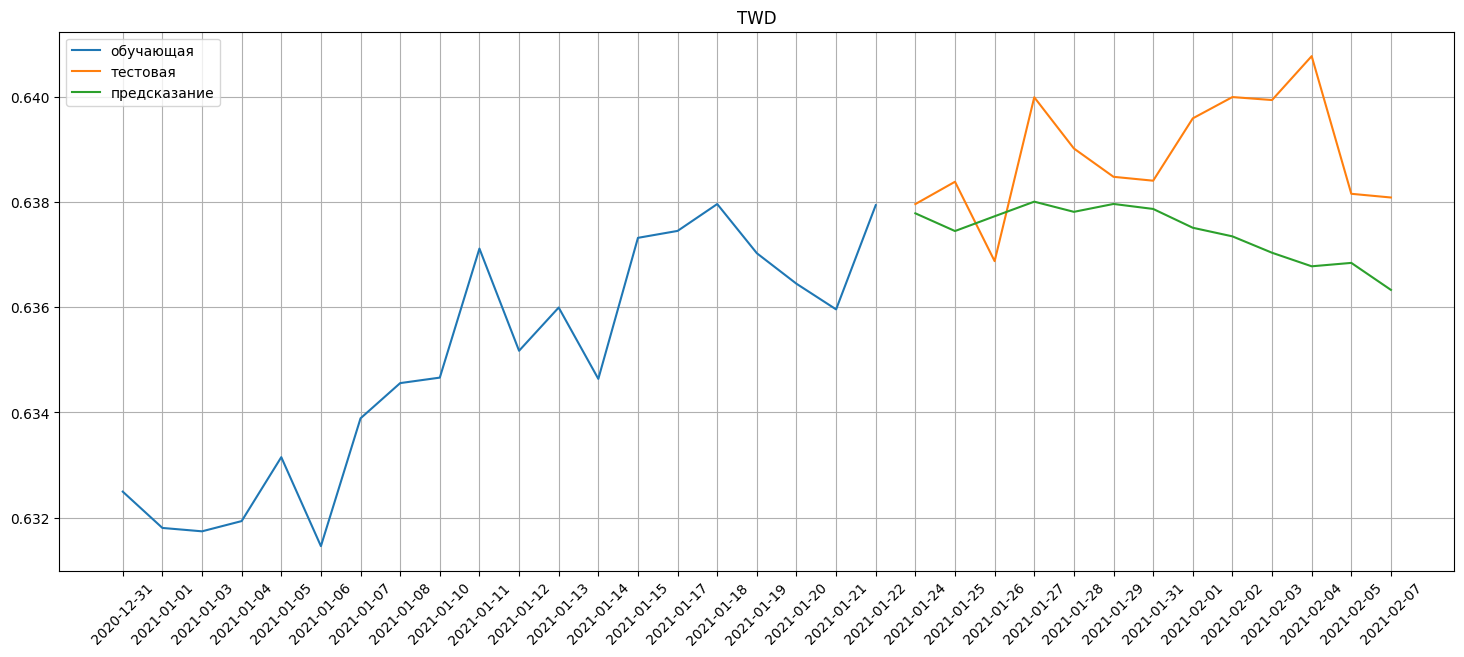


======================================== USD ========================================
2023-12-04 21:43:59,514 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 4.2 MiB
2023-12-04 21:43:59,518 - ApiComposer - Initial pipeline was fitted in 8.2 sec.
2023-12-04 21:43:59,521 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-12-04 21:43:59,541 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 12 min. Set of candidate models: ['polyfit', 'ar', 'locf', 'sparse_lagged', 'ets', 'gaussian_filter', 'clstm', 'arima', 'lagged', 'smoothing', 'stl_arima', 'glm', 'ts_naive_average', 'cut', 'diff_filter', 'exog_ts', 'ets', 'gaussian_filter', 'scaling', 'poly_features', 'ts_naive_average', 'isolation_forest_reg', 'sparse_lagged', 'adareg', 'lagged', 'stl_arima', 'ransac_non_lin_reg', 'dtreg', 'treg', 'cut', 'ar', 'clstm', 'lgbmreg', 'normalization', 'linear

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-12-04 21:49:32,014 - GroupedCondition - Optimisation finished: Early stopping iterations criteria was satisfied


Generations:   0%|          | 1/10000 [05:32<?, ?gen/s]

2023-12-04 21:49:32,047 - ApiComposer - Hyperparameters tuning started with 6 min. timeout


2023-12-04 21:50:09,527 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [lgbmreg, ridge, ridge, glm, data_source_ts/USD, ridge, lagged, linear, decompose]}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/USD - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.062
100%|██████████| 10/10 [06:05<00:00, 36.53s/trial, best loss: 0.04742823453211675]
2023-12-04 21:56:14,838 - PipelineTuner - Tuner stopped after initial search due to the lack of time
2023-12-04 21:57:03,236 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [lgbmreg, ridge, ridge, glm, data_source_ts/USD, ridge, lagged, linear, decompose]}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100,

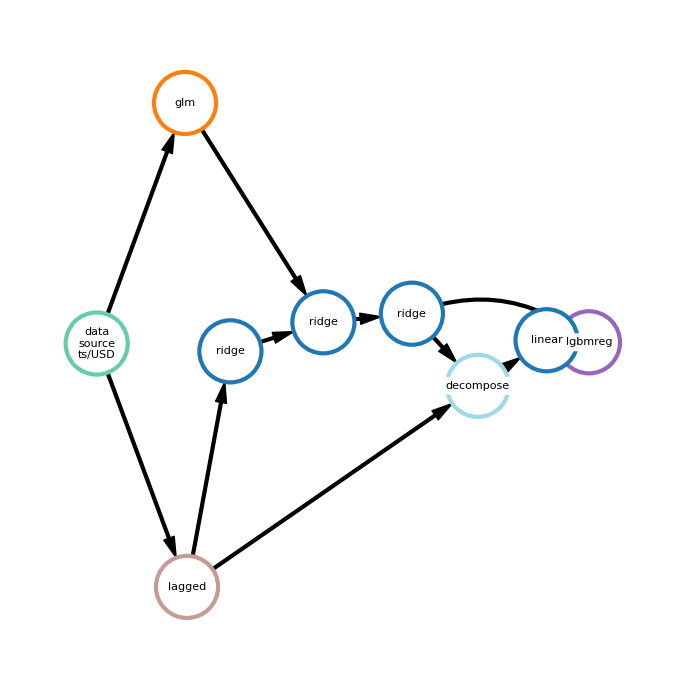

[17.78779297 17.76957501 17.76847813 17.77889057 17.76938335 17.77292702
 17.79112784 17.7898795  17.79628404 17.78751312 17.80108051 17.79722487
 17.80613081 17.81385836 17.81371159 17.81427262 17.81195492 17.81072476
 17.78453147 17.79091021]
{'mae': 0.09, 'mape': 0.005}


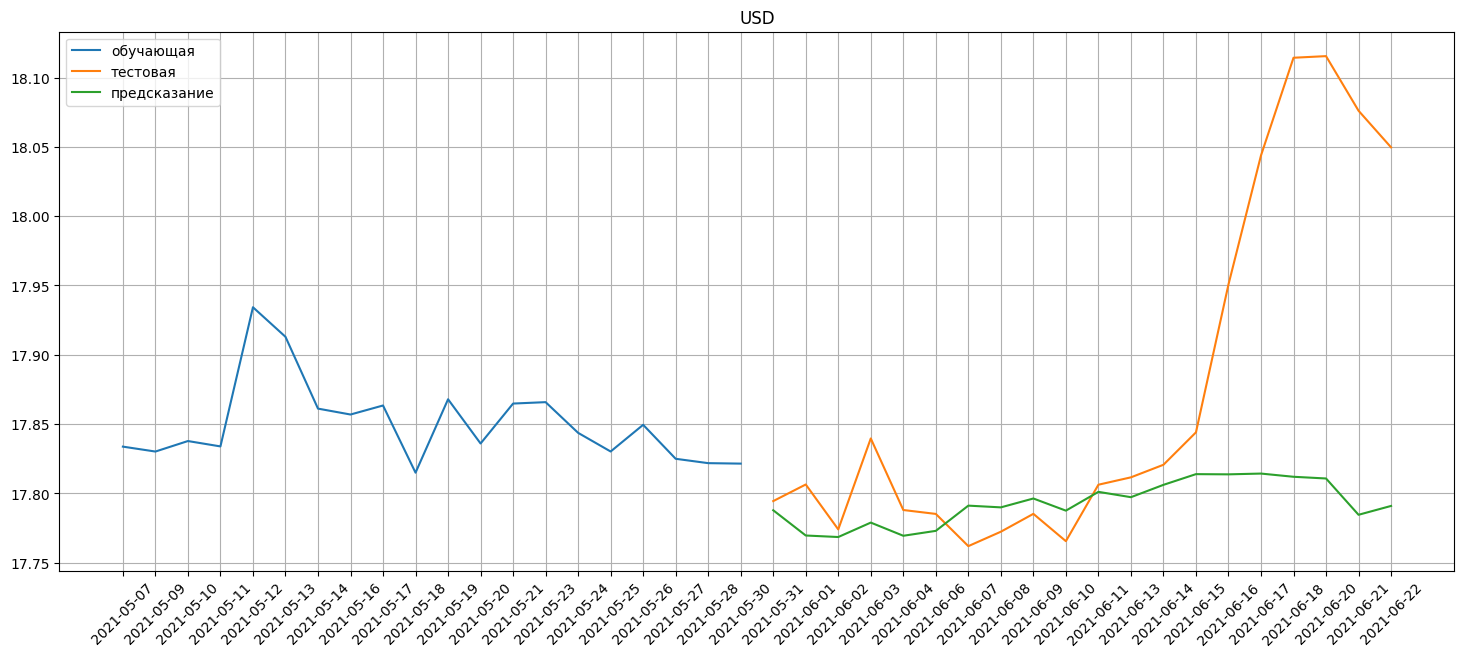

In [7]:
start_time = time.time()

while True:
    
    item = {}
    item['time'] = time.localtime()
    
    print()
    
    elapsed_time = time.time() - start_time
    
    if elapsed_time > 11*60*60:
        break
    
    target_name = random.choice(abscur_data.columns)
    print('='*40, target_name, '='*40)
    
    item['target_name'] = target_name
    
    forecast_length = random.randint(2,20)
    item['forecast_length'] = forecast_length
    
    # случайный сдвиг назад (случайная точка)
    
    delta = random.randint(0,1000-1)
    item['delta'] = delta
    
    # Сборка датасета
    
    target_train = np.ravel(abscur_data[target_name].values[:-forecast_length-delta])
    target_test = np.ravel(abscur_data[target_name].values[-forecast_length-delta:-delta])
    
    item['target_test'] = target_test

    idx_train = abscur_data.index[:-forecast_length-delta]
    idx_test = abscur_data.index[-forecast_length-delta:-delta]
    
    item['idx_test'] = list(idx_test)
    
    historical_data_inp = {}

    inp_name = target_name
    
    historical_data_inp[inp_name] = target_train
            
    # Сборка модели
    
    timeout = random.randint(1,60)
    item['timeout'] = timeout
    
    fedot = Fedot(problem='ts_forecasting',
                  task_params=TsForecastingParams(forecast_length=forecast_length),
                  timeout=timeout)
    
    # Обучение модели
    
    fedot.fit(features=historical_data_inp,
              target=historical_data_inp[target_name])
    
    # Вид сети
    
    fedot.current_pipeline.show()
    model_struct_file = target_name + '_' + str(len(history)) + '_model.png'
    fedot.current_pipeline.show(save_path=model_struct_file)
    item['model_struct_file'] = model_struct_file
    
    model_struct = fedot.current_pipeline.structure
    item['model_struct'] = model_struct
    
    # Предсказание
    
    forecast = fedot.predict(historical_data_inp,in_sample=False)
    print(forecast)
    item['forecast'] = forecast
    
    # Расчет метрик
    
    metrics = fedot.get_metrics(target_test,metric_names=['mae','mape'])
    print(metrics)
    item['metrics'] = metrics
    
    # График
    
    plt.plot(idx_train[-20:],target_train[-20:],label='обучающая')
    plt.plot(idx_test,target_test,label='тестовая')
    plt.plot(idx_test,forecast,label='предсказание')
    plt.grid()
    plt.legend()
    plt.title(target_name)
    plt.xticks(rotation=45)
    
    plot_file = target_name + '_' + str(len(history)) + '_plot.png'
    plt.savefig(plot_file)
    item['plot_file'] = plot_file
    
    plt.show()
    
    history.append(item)
    
#     break

with open("history.pickle", "wb") as file:
    pickle.dump(history, file)

# Аналитика

In [8]:
rep = pd.DataFrame()
rep['time'] = list(item['time'] for item in history)
rep['target_name'] = list(item['target_name'] for item in history)
rep['forecast_length'] = list(item['forecast_length'] for item in history)
rep['delta'] = list(item['delta'] for item in history)
rep['timeout'] = list(item['timeout'] for item in history)
rep['mape'] = list(item['metrics']['mape'] for item in history)
rep

,time,target_name,forecast_length,delta,timeout,mape
0,"(2023, 11, 5, 18, 12, 27, 6, 309, 0)",AED,10,942,1,0.004
1,"(2023, 11, 5, 18, 16, 20, 6, 309, 0)",ZAR,10,583,1,0.011
2,"(2023, 11, 5, 18, 17, 52, 6, 309, 0)",MYR,10,216,1,0.010
3,"(2023, 11, 5, 18, 19, 45, 6, 309, 0)",QAR,10,307,1,0.011
4,"(2023, 11, 5, 18, 21, 29, 6, 309, 0)",COP,10,633,1,0.106
...,...,...,...,...,...,...
316,"(2023, 12, 4, 19, 8, 2, 0, 338, 0)",NOK,20,579,42,0.009
317,"(2023, 12, 4, 19, 52, 0, 0, 338, 0)",USD,4,391,9,0.005
318,"(2023, 12, 4, 20, 3, 40, 0, 338, 0)",PLN,5,483,57,0.012
319,"(2023, 12, 4, 21, 2, 14, 0, 338, 0)",TWD,13,884,38,0.003


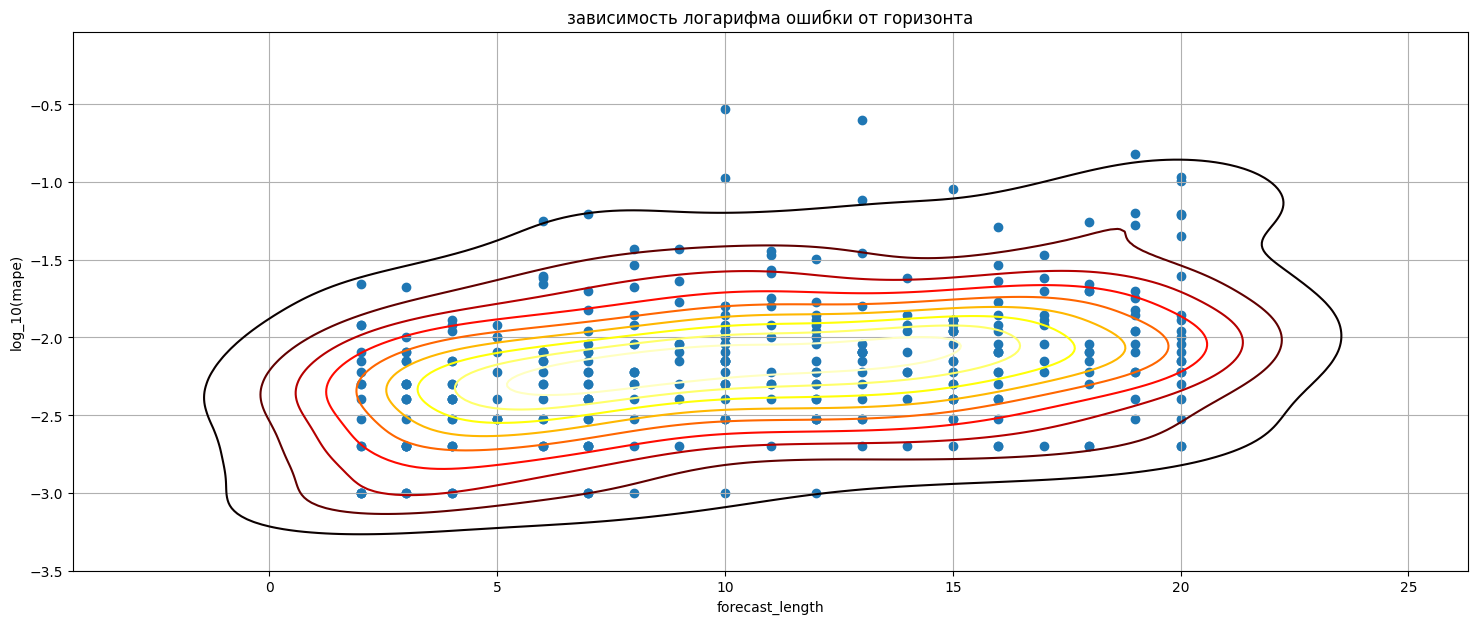

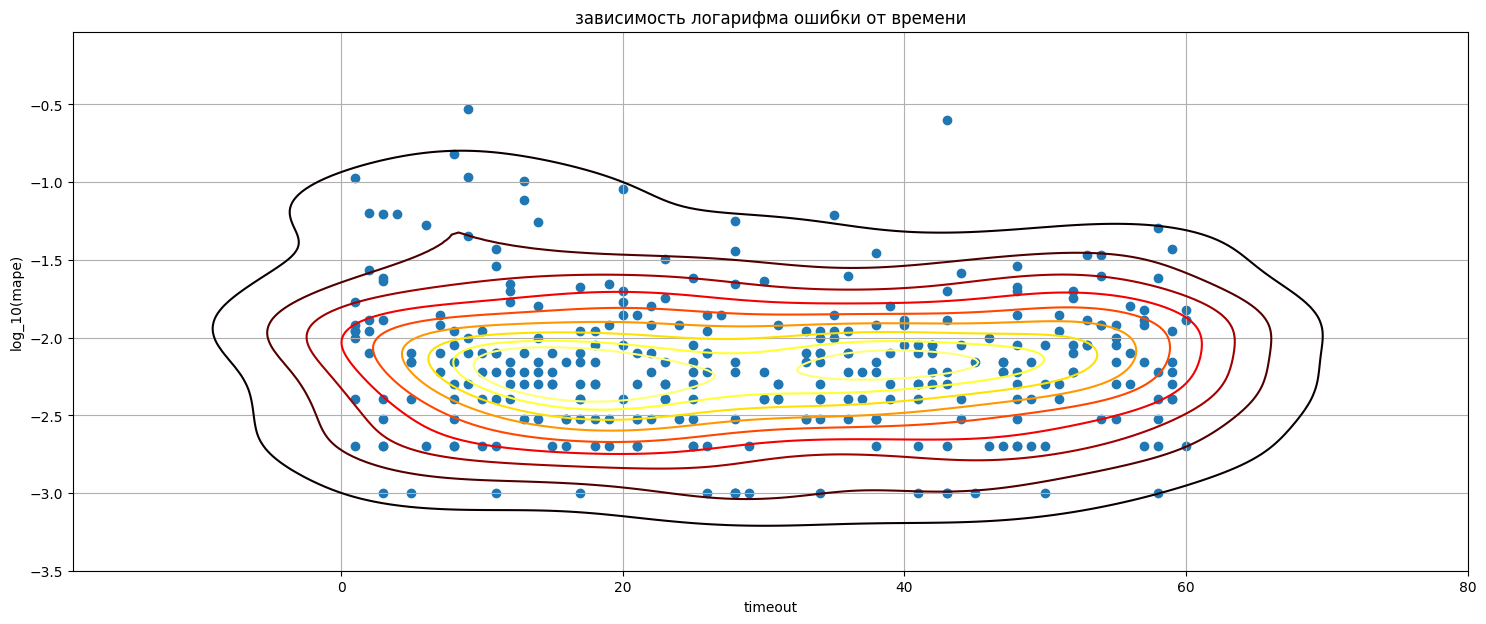

In [9]:
import seaborn as sns

rep['log_10(mape)'] = np.log10(rep['mape'])

sns.kdeplot(data=rep,x='forecast_length',y='log_10(mape)',cmap='hot')
plt.scatter(rep['forecast_length'],rep['log_10(mape)'])
plt.ylabel('log_10(mape)')
plt.title('зависимость логарифма ошибки от горизонта')
plt.grid()
plt.show()

sns.kdeplot(data=rep,x='timeout',y='log_10(mape)',cmap='hot')
plt.scatter(rep['timeout'],rep['log_10(mape)'])
plt.ylabel('log_10(mape)')
plt.title('зависимость логарифма ошибки от времени')
plt.grid()
plt.show()